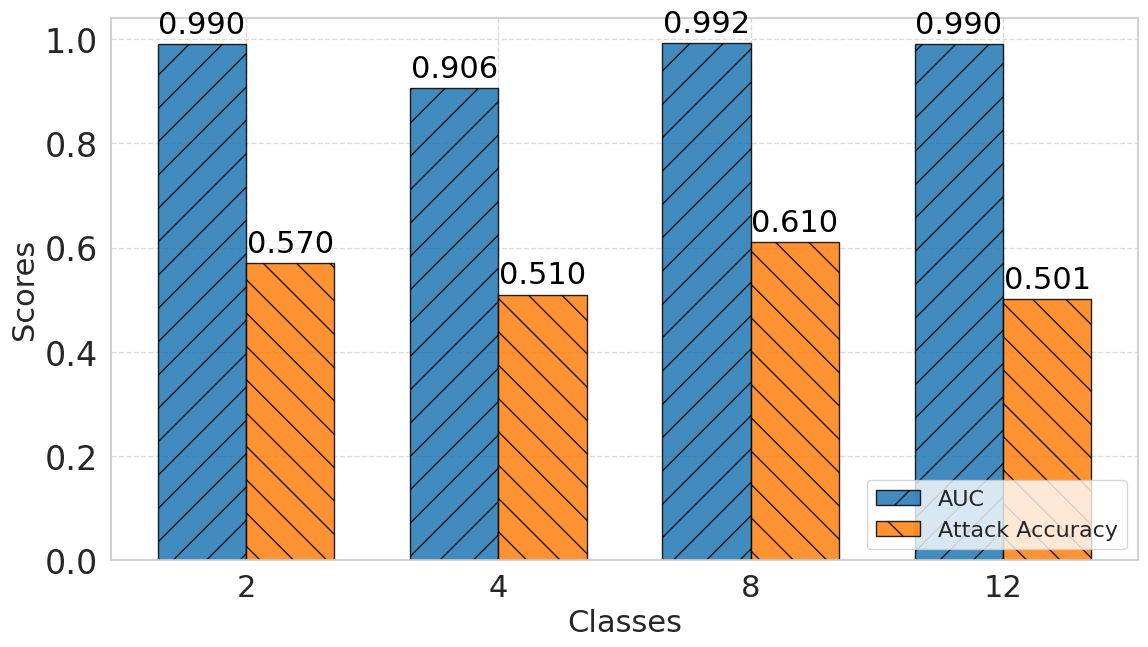

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")  # Set seaborn style for a clean background with gridlines
plt.rcParams.update({'font.size': 24})  # Increase font size for readability

data = pd.read_csv('AUC-Att_Acc.csv')

classes = data['classes']
auc = data['AUC']
attack_accuracy = data['Attack_Accuracy']

bar_width = 0.35
r1 = np.arange(len(classes))  # Positions for the first group of bars (AUC)
r2 = [x + bar_width for x in r1]  # Positions for the second group of bars (Attack Accuracy)

plt.figure(figsize=(12, 7))

# Step 6: Create the bar plot with custom colors, hatches, and bar edges
bars1 = plt.bar(r1, auc, color='#1f77b4', width=bar_width, edgecolor='black', alpha=0.85, hatch='/', label='AUC')
bars2 = plt.bar(r2, attack_accuracy, color='#ff7f0e', width=bar_width, edgecolor='black', alpha=0.85, hatch='\\', label='Attack Accuracy')

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=22, color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=22, color='black')

plt.xlabel('Classes', fontsize=22)
plt.ylabel('Scores', fontsize=22)
plt.xticks([r + bar_width / 2 for r in range(len(classes))], classes, fontsize=22)
plt.yticks(fontsize=24)
#plt.title('', fontweight='bold', fontsize=16, color='darkblue')

plt.legend(loc='lower right',fontsize=16)
#plt.legend(bars, legend_labels, title='Classes', loc='lower right', fontsize=12, title_fontsize='13', frameon=True)

plt.grid(True, linestyle='--', alpha=0.7)  # Light grid lines
plt.tight_layout()

plt.savefig('fancy_AUC_Att_Acc_plot.png', dpi=300, bbox_inches='tight')  # Save as high-res PNG
plt.show()


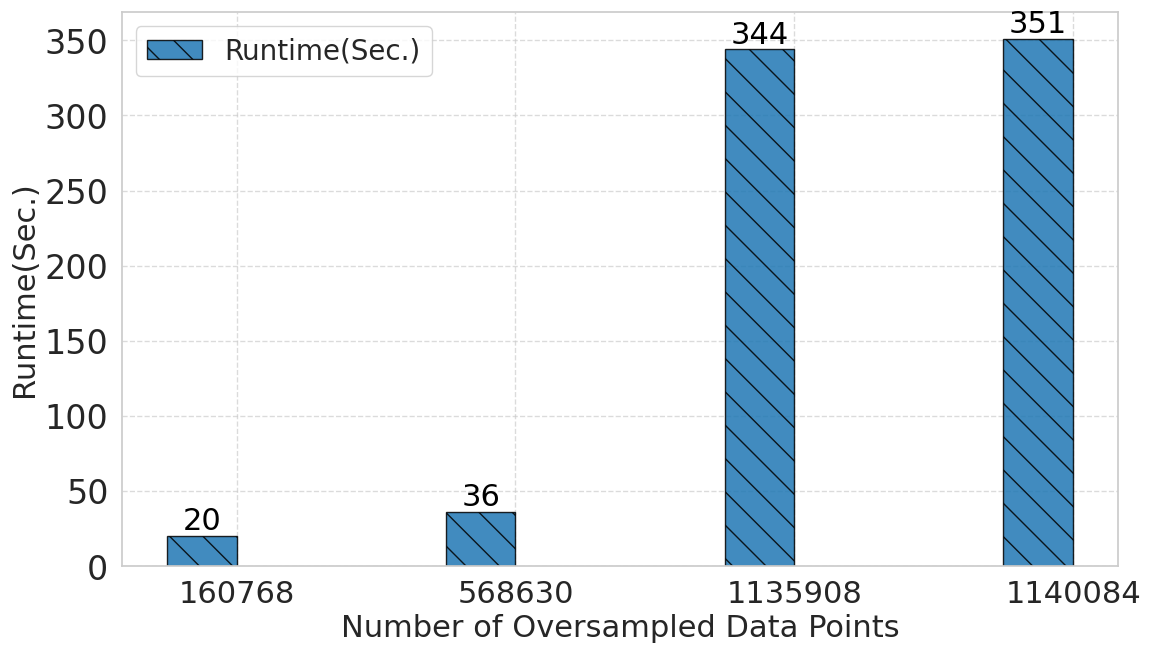

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")  # Set seaborn style for a clean background with gridlines
plt.rcParams.update({'font.size': 22})  # Increase font size for readability

data = pd.read_csv('runtime_PP-SMOTE.csv')

classes = data['class_count']
features = data["features"]
imbalance_ratio = data["imabalance_ratio"]
oversampled_data_points = data["oversampled_data_points"]
runtime = data["runtime(sec.)"]

bar_width = 0.25
r3 = np.arange(len(oversampled_data_points))  # Positions for the first group of bars (AUC)


plt.figure(figsize=(12, 7))

bars3 = plt.bar(r3, runtime, color='#1f77b4', width=bar_width, edgecolor='black', alpha=0.85, hatch='\\', label='Runtime(Sec.)')

for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.0f}', ha='center', va='bottom', fontsize=22, color='black')
    
plt.xlabel('Number of Oversampled Data Points', fontsize=22)
plt.ylabel('Runtime(Sec.)', fontsize=22)
plt.xticks([r + bar_width / 2 for r in range(len(oversampled_data_points))], oversampled_data_points, fontsize=22)
plt.yticks(fontsize=24)
#plt.title('', fontweight='bold', fontsize=16, color='darkblue')

plt.legend(loc='upper left',fontsize=20)
#plt.legend(bars, legend_labels, title='Classes', loc='lower right', fontsize=12, title_fontsize='13', frameon=True)

plt.grid(True, linestyle='--', alpha=0.7)  # Light grid lines
plt.tight_layout()

plt.savefig('datapoints_runtime_plot.png', dpi=300, bbox_inches='tight')  # Save as high-res PNG
plt.show()


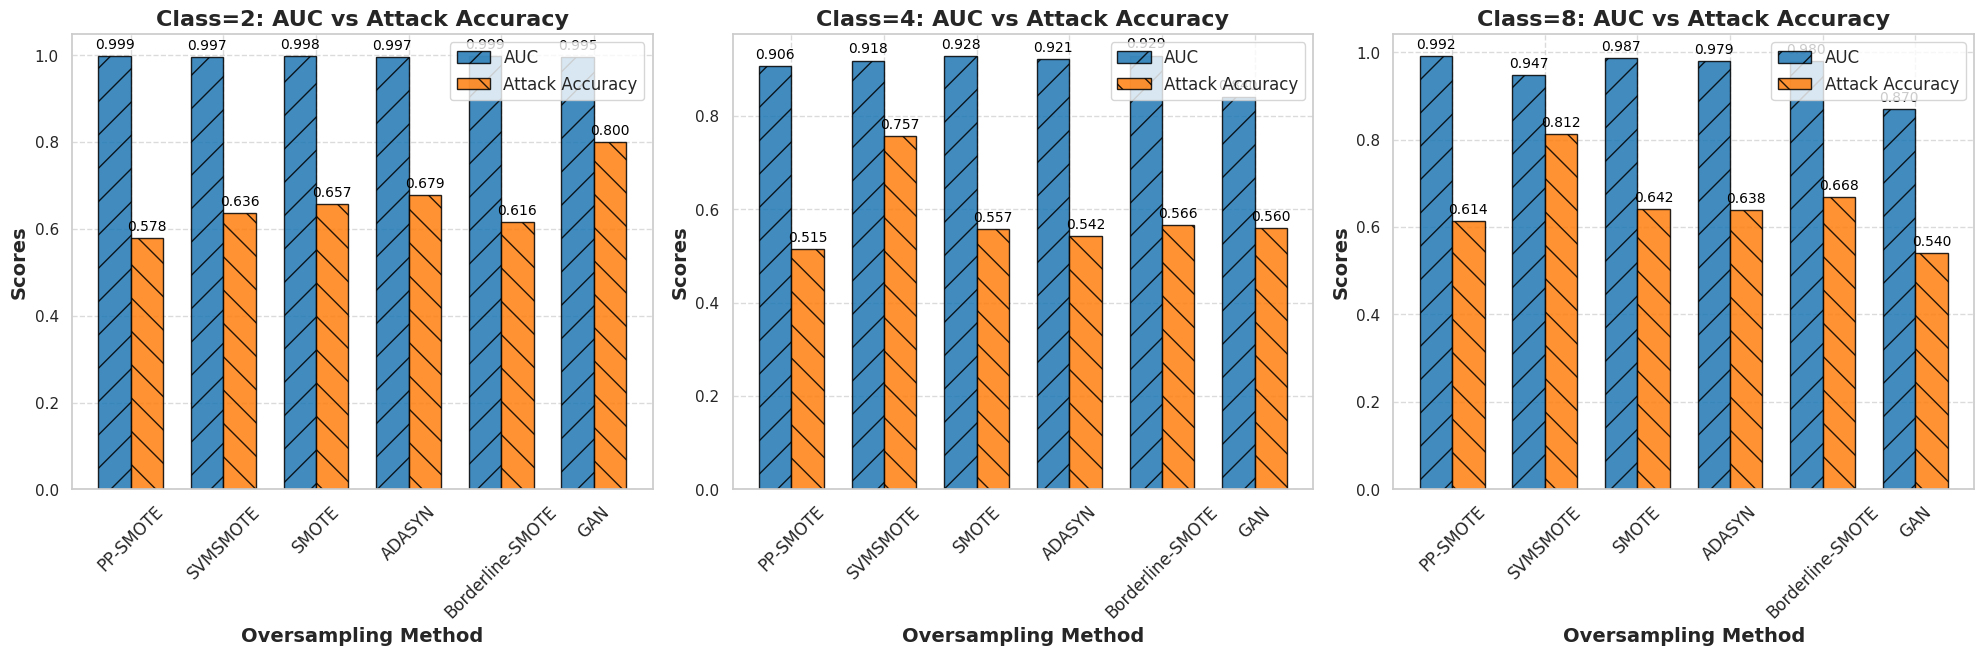

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Set seaborn style for a cleaner look
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})  # Increase font size

# Step 2: Load the CSV files for each class
class_2 = pd.read_csv('Class-2-auc-attack.csv')
class_4 = pd.read_csv('Class-4-auc-attack.csv')
class_8 = pd.read_csv('Class-8-auc-attack.csv')

# Step 3: Define the function to plot a grouped bar chart for each class
def plot_class_performance(class_data, class_label, ax):
    oversampling_methods = class_data['oversampling']
    auc = class_data['AUC']
    attack_accuracy = class_data['Attack_Accuracy']

    # Set the bar width and positions
    bar_width = 0.35
    index = np.arange(len(oversampling_methods))

    # Create the bars for AUC and Attack Accuracy with custom styling
    bars1 = ax.bar(index, auc, bar_width, label='AUC', color='#1f77b4', edgecolor='black', hatch='/', alpha=0.85)
    bars2 = ax.bar(index + bar_width, attack_accuracy, bar_width, label='Attack Accuracy', color='#ff7f0e', edgecolor='black', hatch='\\', alpha=0.85)

    # Add labels on top of the bars for AUC and Attack Accuracy
    for bar in bars1:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10, color='black')
    for bar in bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10, color='black')

    # Set labels, title, and ticks
    ax.set_xlabel('Oversampling Method', fontsize=14, fontweight='bold')
    ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
    ax.set_title(f'Class={class_label}: AUC vs Attack Accuracy', fontsize=16, fontweight='bold')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(oversampling_methods, rotation=45, fontsize=12)
    ax.legend(fontsize=12)

    # Add gridlines for clarity
    ax.grid(True, linestyle='--', alpha=0.7)

# Step 4: Create the figure and subplots for Class 2, Class 4, Class 8
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Step 5: Plot the performance for each class using the custom function
plot_class_performance(class_2, 2, axes[0])
plot_class_performance(class_4, 4, axes[1])
plot_class_performance(class_8, 8, axes[2])

# Step 6: Adjust layout and add the overall title
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('', fontsize=20, fontweight='bold', color='darkblue')

# Step 7: Save the plot as a high-resolution PNG file
plt.savefig('fancy_class_comparison_auc_attack.png', dpi=300, bbox_inches='tight')
plt.show()


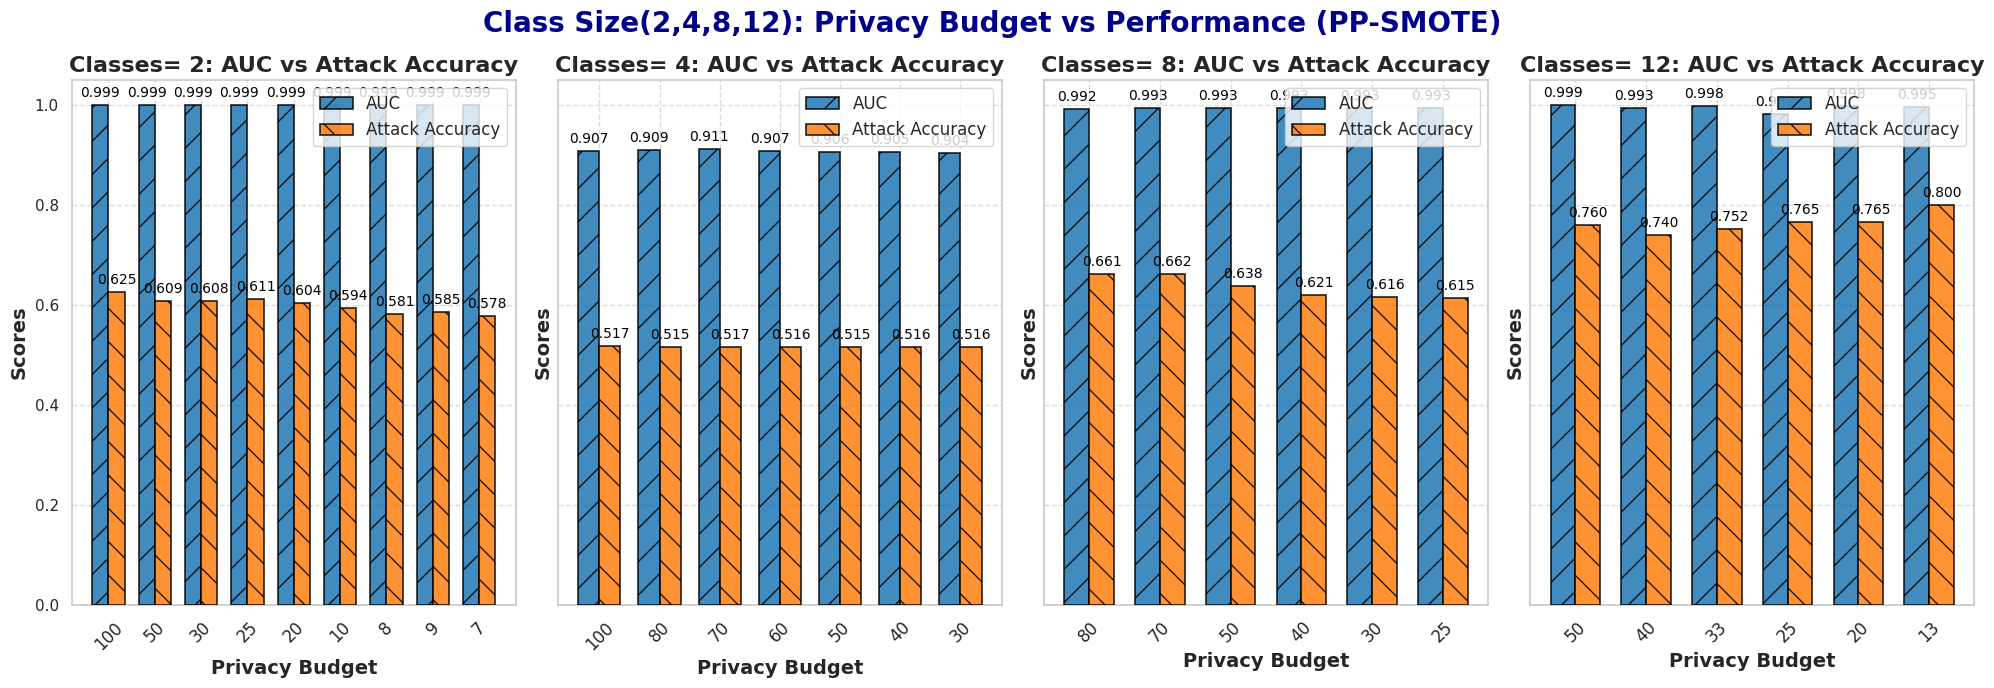

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Set the plot style
sns.set(style="whitegrid")  # Set seaborn style for fancy gridlines
plt.rcParams.update({'font.size': 12})  # Increase font size for better readability

# Step 2: Load the CSV files for each class
class_2 = pd.read_csv('Class-2-PP-SMOTE.csv')
class_4 = pd.read_csv('Class-4-PP-SMOTE.csv')
class_8 = pd.read_csv('Class-8-PP-SMOTE.csv')
class_12= pd.read_csv('Class-12-PP-SMOTE.csv')

# Step 3: Create a function to plot a grouped bar chart for each class with fancy effects
def plot_class_performance(class_data, class_label, ax):
    privacy_budget = class_data['privacy_Budget']
    auc = class_data['AUC']
    attack_accuracy = class_data['Attack_Accuracy']

    # Set the bar width and positions
    bar_width = 0.35
    index = np.arange(len(privacy_budget))

    # Create the bars for AUC and Attack Accuracy with shadow effect
    bars1 = ax.bar(index, auc, bar_width, label='AUC', color='#1f77b4', alpha=0.85, edgecolor='black', linewidth=1.2, hatch='/', zorder=3)
    bars2 = ax.bar(index + bar_width, attack_accuracy, bar_width, label='Attack Accuracy', color='#ff7f0e', alpha=0.85, edgecolor='black', linewidth=1.2, hatch='\\', zorder=3)

    # Add data labels on top of the bars
    for bar in bars1 + bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10, color='black')

    # Add labels, titles, and ticks
    ax.set_xlabel('Privacy Budget', fontsize=14, fontweight='bold')
    ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
    ax.set_title(f'Classes= {class_label}: AUC vs Attack Accuracy', fontsize=16, fontweight='bold')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(privacy_budget, rotation=45, fontsize=12)
    ax.legend(fontsize=12)

    # Fancy grid and background enhancements
    ax.grid(True, linestyle='--', alpha=0.7, zorder=0)  # Dashed grid lines for aesthetics
    ax.set_axisbelow(True)  # Ensures grid lines are behind bars

# Step 4: Create the figure and axes for the 3 subplots (for Class 2, Class 4, Class 8)
fig, axes = plt.subplots(1, 4, figsize=(20, 7), sharey=True)  # Larger figure for better readability

# Step 5: Plot the performance for each class with fancy effects
plot_class_performance(class_2, 2, axes[0])
plot_class_performance(class_4, 4, axes[1])
plot_class_performance(class_8, 8, axes[2])
plot_class_performance(class_12, 12, axes[3])

# Step 6: Adjust layout and save the plot
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust the spacing at the top
fig.suptitle('Class Size(2,4,8,12): Privacy Budget vs Performance (PP-SMOTE)', fontsize=20, fontweight='bold', color='darkblue')  # Main title
plt.savefig('fancy_class_comparison_PP-SMOTE.png', dpi=300, bbox_inches='tight')  # Save the figure as a high-resolution PNG file
plt.show()


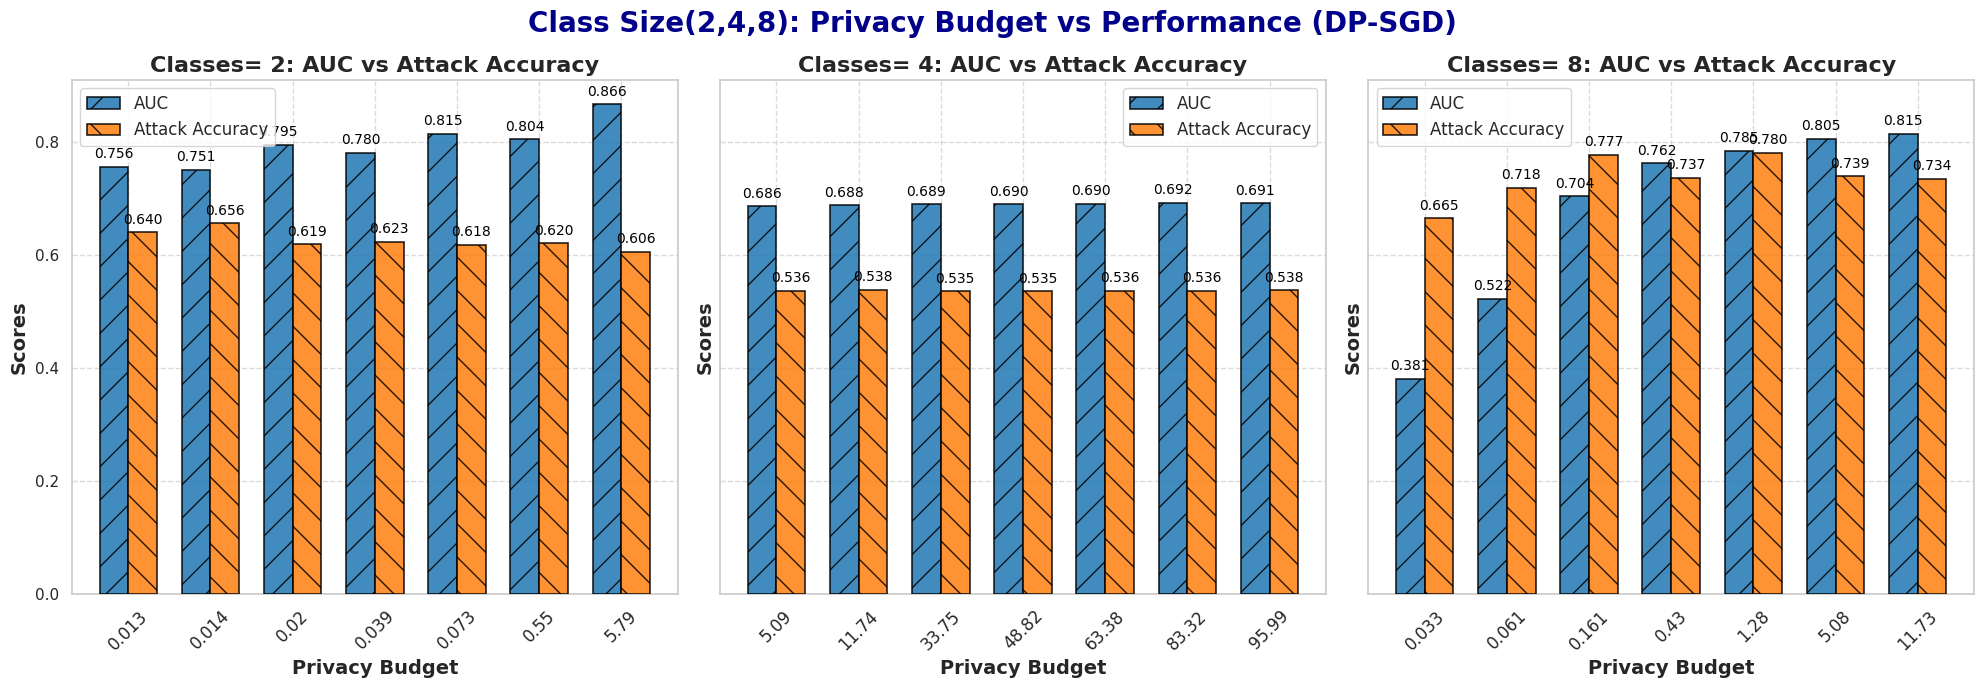

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Set the plot style
sns.set(style="whitegrid")  # Set seaborn style for fancy gridlines
plt.rcParams.update({'font.size': 12})  # Increase font size for better readability

# Step 2: Load the CSV files for each class
class_2 = pd.read_csv('Class-2-DP-SGD.csv')
class_4 = pd.read_csv('Class-4-DP-SGD.csv')
class_8 = pd.read_csv('Class-8-DP-SGD.csv')

# Step 3: Create a function to plot a grouped bar chart for each class with fancy effects
def plot_class_performance(class_data, class_label, ax):
    privacy_budget = class_data['privacy_Budget']
    auc = class_data['AUC']
    attack_accuracy = class_data['Attack_Accuracy']

    # Set the bar width and positions
    bar_width = 0.35
    index = np.arange(len(privacy_budget))

    # Create the bars for AUC and Attack Accuracy with shadow effect
    bars1 = ax.bar(index, auc, bar_width, label='AUC', color='#1f77b4', alpha=0.85, edgecolor='black', linewidth=1.2, hatch='/', zorder=3)
    bars2 = ax.bar(index + bar_width, attack_accuracy, bar_width, label='Attack Accuracy', color='#ff7f0e', alpha=0.85, edgecolor='black', linewidth=1.2, hatch='\\', zorder=3)

    # Add data labels on top of the bars
    for bar in bars1 + bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10, color='black')

    # Add labels, titles, and ticks
    ax.set_xlabel('Privacy Budget', fontsize=14, fontweight='bold')
    ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
    ax.set_title(f'Classes= {class_label}: AUC vs Attack Accuracy', fontsize=16, fontweight='bold')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(privacy_budget, rotation=45, fontsize=12)
    ax.legend(fontsize=12)

    # Fancy grid and background enhancements
    ax.grid(True, linestyle='--', alpha=0.7, zorder=0)  # Dashed grid lines for aesthetics
    ax.set_axisbelow(True)  # Ensures grid lines are behind bars

# Step 4: Create the figure and axes for the 3 subplots (for Class 2, Class 4, Class 8)
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)  # Larger figure for better readability

# Step 5: Plot the performance for each class with fancy effects
plot_class_performance(class_2, 2, axes[0])
plot_class_performance(class_4, 4, axes[1])
plot_class_performance(class_8, 8, axes[2])

# Step 6: Adjust layout and save the plot
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust the spacing at the top
fig.suptitle('Class Size(2,4,8): Privacy Budget vs Performance (DP-SGD)', fontsize=20, fontweight='bold', color='darkblue')  # Main title
plt.savefig('fancy_class_comparison_DP-SGD.png', dpi=300, bbox_inches='tight')  # Save the figure as a high-resolution PNG file
plt.show()


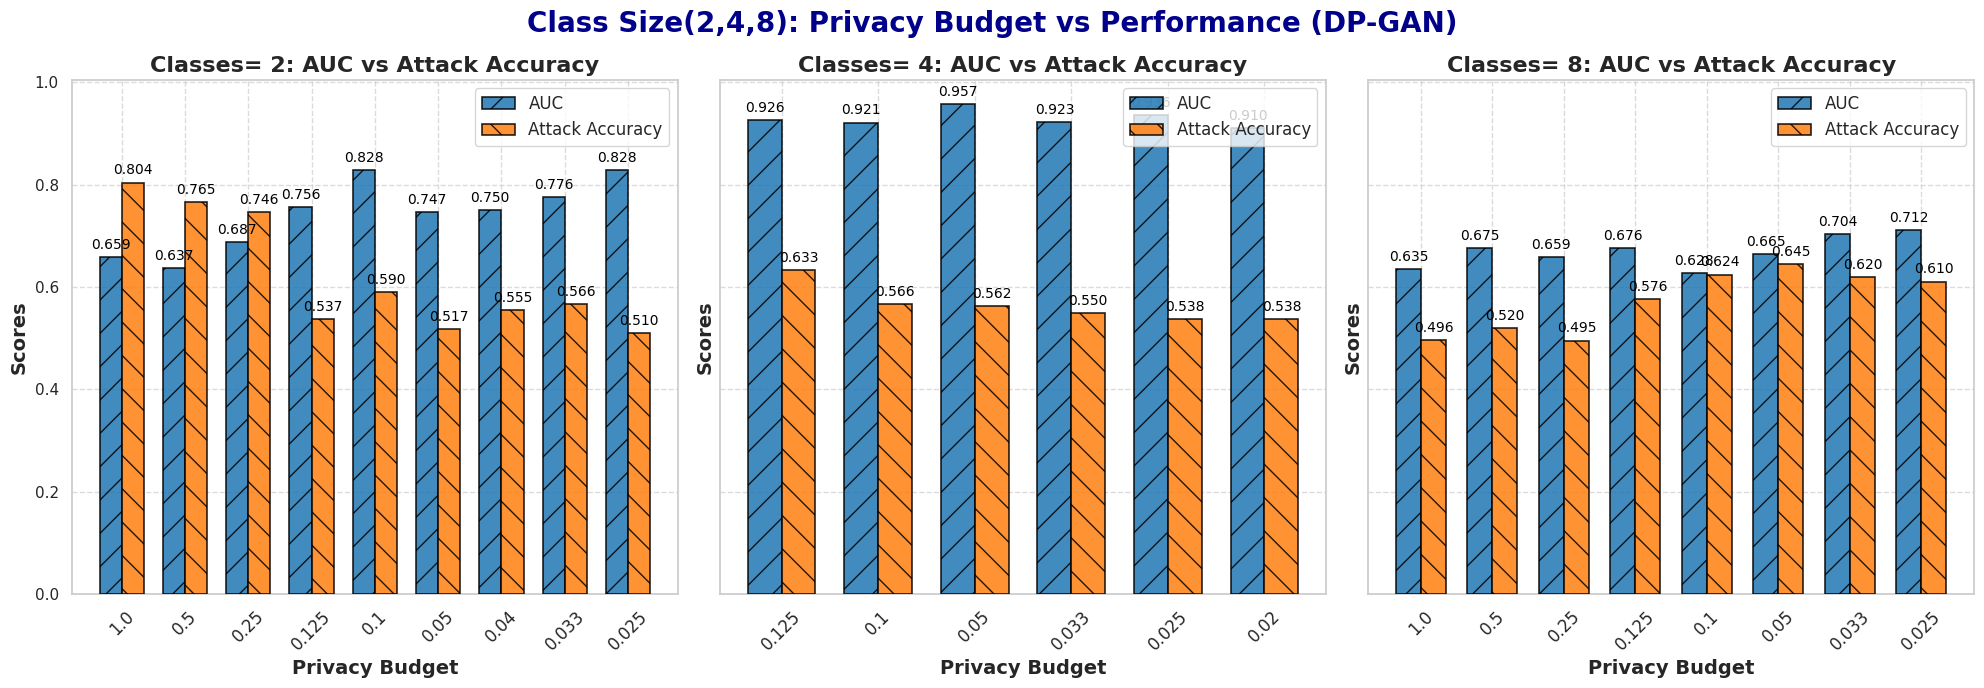

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Set the plot style
sns.set(style="whitegrid")  # Set seaborn style for fancy gridlines
plt.rcParams.update({'font.size': 12})  # Increase font size for better readability

# Step 2: Load the CSV files for each class
class_2 = pd.read_csv('Class-2-DP-GAN.csv')
class_4 = pd.read_csv('Class-4-DP-GAN.csv')
class_8 = pd.read_csv('Class-8-DP-GAN.csv')

# Step 3: Create a function to plot a grouped bar chart for each class with fancy effects
def plot_class_performance(class_data, class_label, ax):
    privacy_budget = class_data['privacy_Budget']
    auc = class_data['AUC']
    attack_accuracy = class_data['Attack_Accuracy']

    # Set the bar width and positions
    bar_width = 0.35
    index = np.arange(len(privacy_budget))

    # Create the bars for AUC and Attack Accuracy with shadow effect
    bars1 = ax.bar(index, auc, bar_width, label='AUC', color='#1f77b4', alpha=0.85, edgecolor='black', linewidth=1.2, hatch='/', zorder=3)
    bars2 = ax.bar(index + bar_width, attack_accuracy, bar_width, label='Attack Accuracy', color='#ff7f0e', alpha=0.85, edgecolor='black', linewidth=1.2, hatch='\\', zorder=3)

    # Add data labels on top of the bars
    for bar in bars1 + bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10, color='black')

    # Add labels, titles, and ticks
    ax.set_xlabel('Privacy Budget', fontsize=14, fontweight='bold')
    ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
    ax.set_title(f'Classes= {class_label}: AUC vs Attack Accuracy', fontsize=16, fontweight='bold')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(privacy_budget, rotation=45, fontsize=12)
    ax.legend(fontsize=12)

    # Fancy grid and background enhancements
    ax.grid(True, linestyle='--', alpha=0.7, zorder=0)  # Dashed grid lines for aesthetics
    ax.set_axisbelow(True)  # Ensures grid lines are behind bars

# Step 4: Create the figure and axes for the 3 subplots (for Class 2, Class 4, Class 8)
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)  # Larger figure for better readability

# Step 5: Plot the performance for each class with fancy effects
plot_class_performance(class_2, 2, axes[0])
plot_class_performance(class_4, 4, axes[1])
plot_class_performance(class_8, 8, axes[2])

# Step 6: Adjust layout and save the plot
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust the spacing at the top
fig.suptitle('Class Size(2,4,8): Privacy Budget vs Performance (DP-GAN)', fontsize=20, fontweight='bold', color='darkblue')  # Main title
plt.savefig('fancy_class_comparison_DP-GAN.png', dpi=300, bbox_inches='tight')  # Save the figure as a high-resolution PNG file
plt.show()


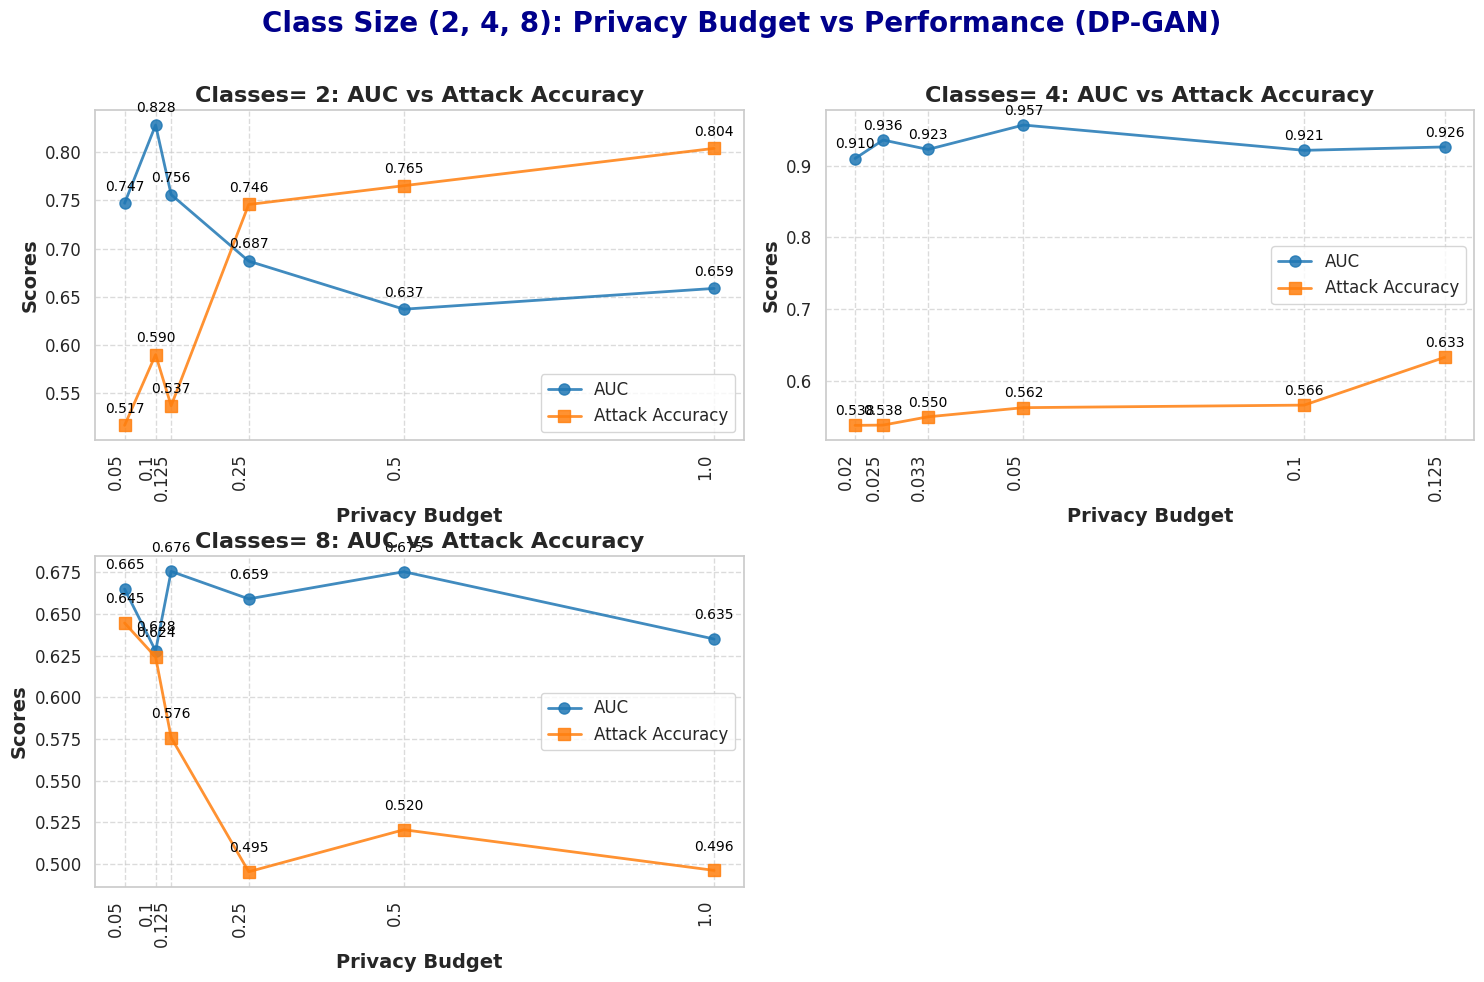

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Set the plot style
sns.set(style="whitegrid")  # Set seaborn style for fancy gridlines
plt.rcParams.update({'font.size': 12})  # Increase font size for better readability

# Step 2: Load the CSV files for each class
class_2 = pd.read_csv('Class-2-DP-GAN.csv')
class_4 = pd.read_csv('Class-4-DP-GAN.csv')
class_8 = pd.read_csv('Class-8-DP-GAN.csv')

# Step 3: Create a function to plot a line graph for each class
def plot_class_performance(class_data, class_label, ax):
    privacy_budget = class_data['privacy_Budget']
    auc = class_data['AUC']
    attack_accuracy = class_data['Attack_Accuracy']

    # Plot lines with markers for AUC and Attack Accuracy
    ax.plot(privacy_budget, auc, marker='o', label='AUC', color='#1f77b4', linewidth=2, markersize=8, alpha=0.85)
    ax.plot(privacy_budget, attack_accuracy, marker='s', label='Attack Accuracy', color='#ff7f0e', linewidth=2, markersize=8, alpha=0.85)

    # Add data labels on each point for AUC and Attack Accuracy
    for i, (x, y) in enumerate(zip(privacy_budget, auc)):
        ax.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=10, color='black')
    for i, (x, y) in enumerate(zip(privacy_budget, attack_accuracy)):
        ax.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=10, color='black')

    # Add labels, titles, and ticks
    ax.set_xlabel('Privacy Budget', fontsize=14, fontweight='bold')
    ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
    ax.set_title(f'Classes= {class_label}: AUC vs Attack Accuracy', fontsize=16, fontweight='bold')

    # Rotate x-axis tick labels to avoid overlap
    ax.set_xticks(privacy_budget)
    ax.set_xticklabels(privacy_budget, rotation=90, ha='right', fontsize=12)

    # Set the y-ticks explicitly so that y-axis tick values are shown for all graphs
    ax.yaxis.set_tick_params(labelsize=12)
    ax.legend(fontsize=12)

    # Fancy grid and background enhancements
    ax.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines for aesthetics

# Step 4: Create the figure and axes for the 2x2 grid (for Class 2, Class 4, Class 8)
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)  # 2x2 grid, one will remain empty

# Step 5: Plot the performance for each class with fancy effects
plot_class_performance(class_2, 2, axes[0, 0])
plot_class_performance(class_4, 4, axes[0, 1])
plot_class_performance(class_8, 8, axes[1, 0])

# Step 6: Hide the empty subplot (axes[1, 1])
axes[1, 1].axis('off')

# Step 7: Adjust layout and save the plot
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust the spacing at the top
fig.suptitle('Class Size (2, 4, 8): Privacy Budget vs Performance (DP-GAN)', fontsize=20, fontweight='bold', color='darkblue')  # Main title
plt.savefig('fancy_class_comparison_DP-GAN_2row.png', dpi=300, bbox_inches='tight')  # Save the figure as a high-resolution PNG file
plt.show()


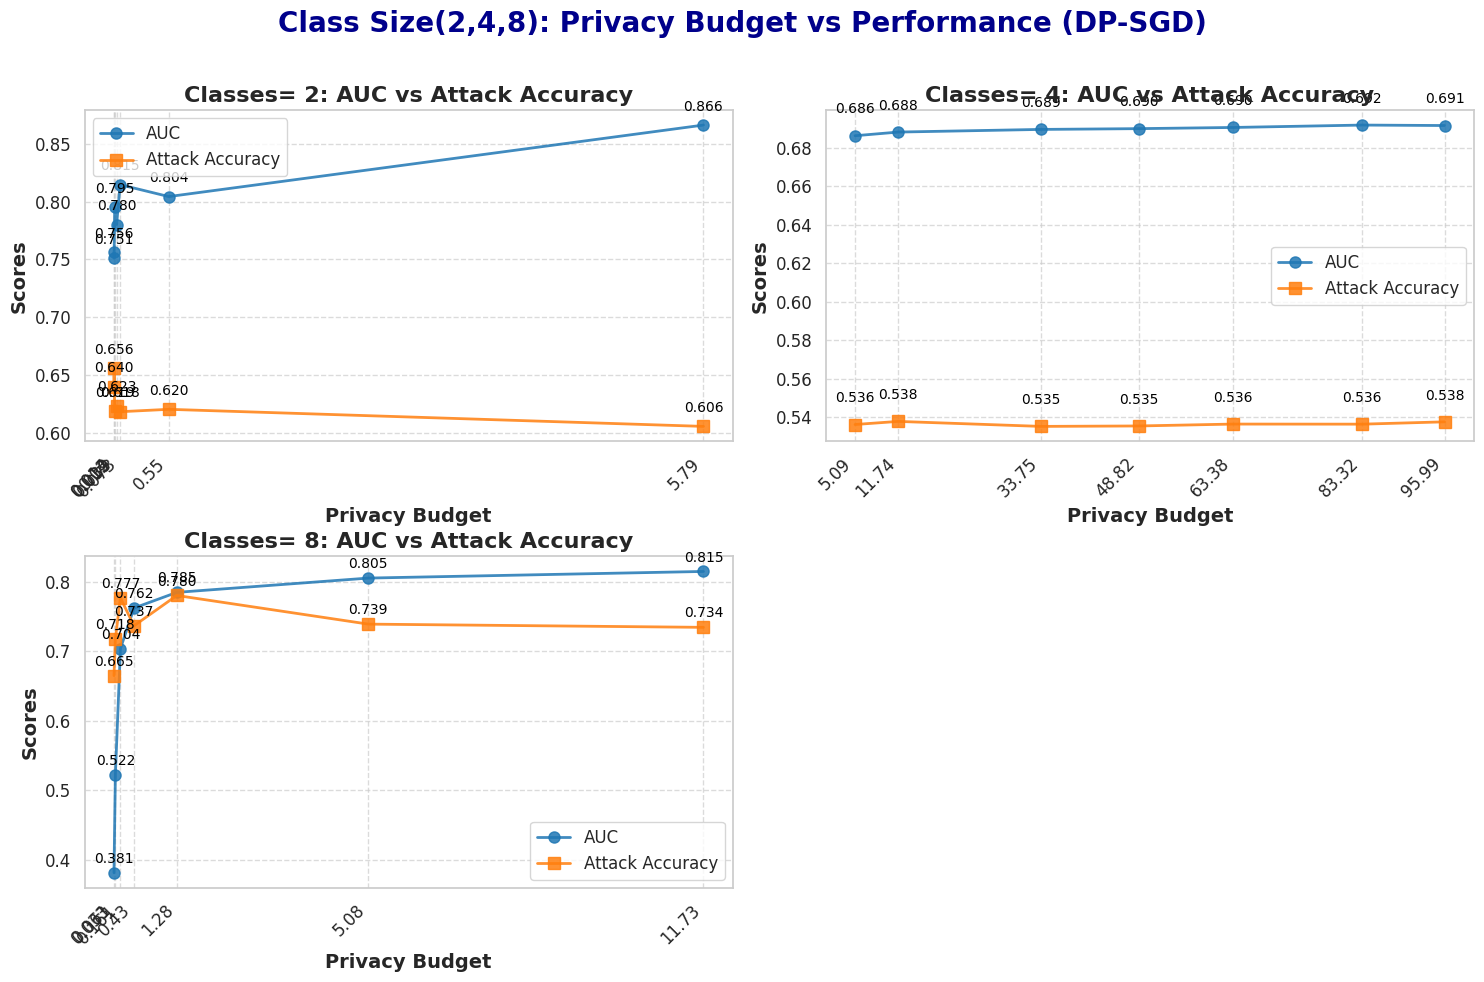

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Set the plot style
sns.set(style="whitegrid")  # Set seaborn style for fancy gridlines
plt.rcParams.update({'font.size': 12})  # Increase font size for better readability

# Step 2: Load the CSV files for each class
class_2 = pd.read_csv('Class-2-DP-SGD.csv')
class_4 = pd.read_csv('Class-4-DP-SGD.csv')
class_8 = pd.read_csv('Class-8-DP-SGD.csv')

# Step 3: Create a function to plot a line graph for each class
def plot_class_performance(class_data, class_label, ax):
    privacy_budget = class_data['privacy_Budget']
    auc = class_data['AUC']
    attack_accuracy = class_data['Attack_Accuracy']

    # Plot lines with markers for AUC and Attack Accuracy
    ax.plot(privacy_budget, auc, marker='o', label='AUC', color='#1f77b4', linewidth=2, markersize=8, alpha=0.85)
    ax.plot(privacy_budget, attack_accuracy, marker='s', label='Attack Accuracy', color='#ff7f0e', linewidth=2, markersize=8, alpha=0.85)

    # Add data labels on each point for AUC and Attack Accuracy
    for i, (x, y) in enumerate(zip(privacy_budget, auc)):
        ax.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=10, color='black')
    for i, (x, y) in enumerate(zip(privacy_budget, attack_accuracy)):
        ax.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=10, color='black')

    # Add labels, titles, and ticks
    ax.set_xlabel('Privacy Budget', fontsize=14, fontweight='bold')
    ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
    ax.set_title(f'Classes= {class_label}: AUC vs Attack Accuracy', fontsize=16, fontweight='bold')

    # Rotate x-axis tick labels to avoid overlap
    ax.set_xticks(privacy_budget)
    ax.set_xticklabels(privacy_budget, rotation=45, ha='right', fontsize=12)

    # Set the y-ticks explicitly so that y-axis tick values are shown for all graphs
    ax.yaxis.set_tick_params(labelsize=12)
    ax.legend(fontsize=12)

    # Fancy grid and background enhancements
    ax.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines for aesthetics

# Step 4: Create the figure and axes for the 2x2 grid (for Class 2, Class 4, Class 8)
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)  # 2x2 grid, one will remain empty

# Step 5: Plot the performance for each class with fancy effects
plot_class_performance(class_2, 2, axes[0, 0])
plot_class_performance(class_4, 4, axes[0, 1])
plot_class_performance(class_8, 8, axes[1, 0])

# Step 6: Hide the empty subplot (axes[1, 1])
axes[1, 1].axis('off')

# Step 7: Adjust layout and save the plot
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust the spacing at the top
fig.suptitle('Class Size(2,4,8): Privacy Budget vs Performance (DP-SGD)', fontsize=20, fontweight='bold', color='darkblue')  # Main title
plt.savefig('fancy_class_comparison_DP-SGD_2row.png', dpi=300, bbox_inches='tight')  # Save the figure as a high-resolution PNG file
plt.show()


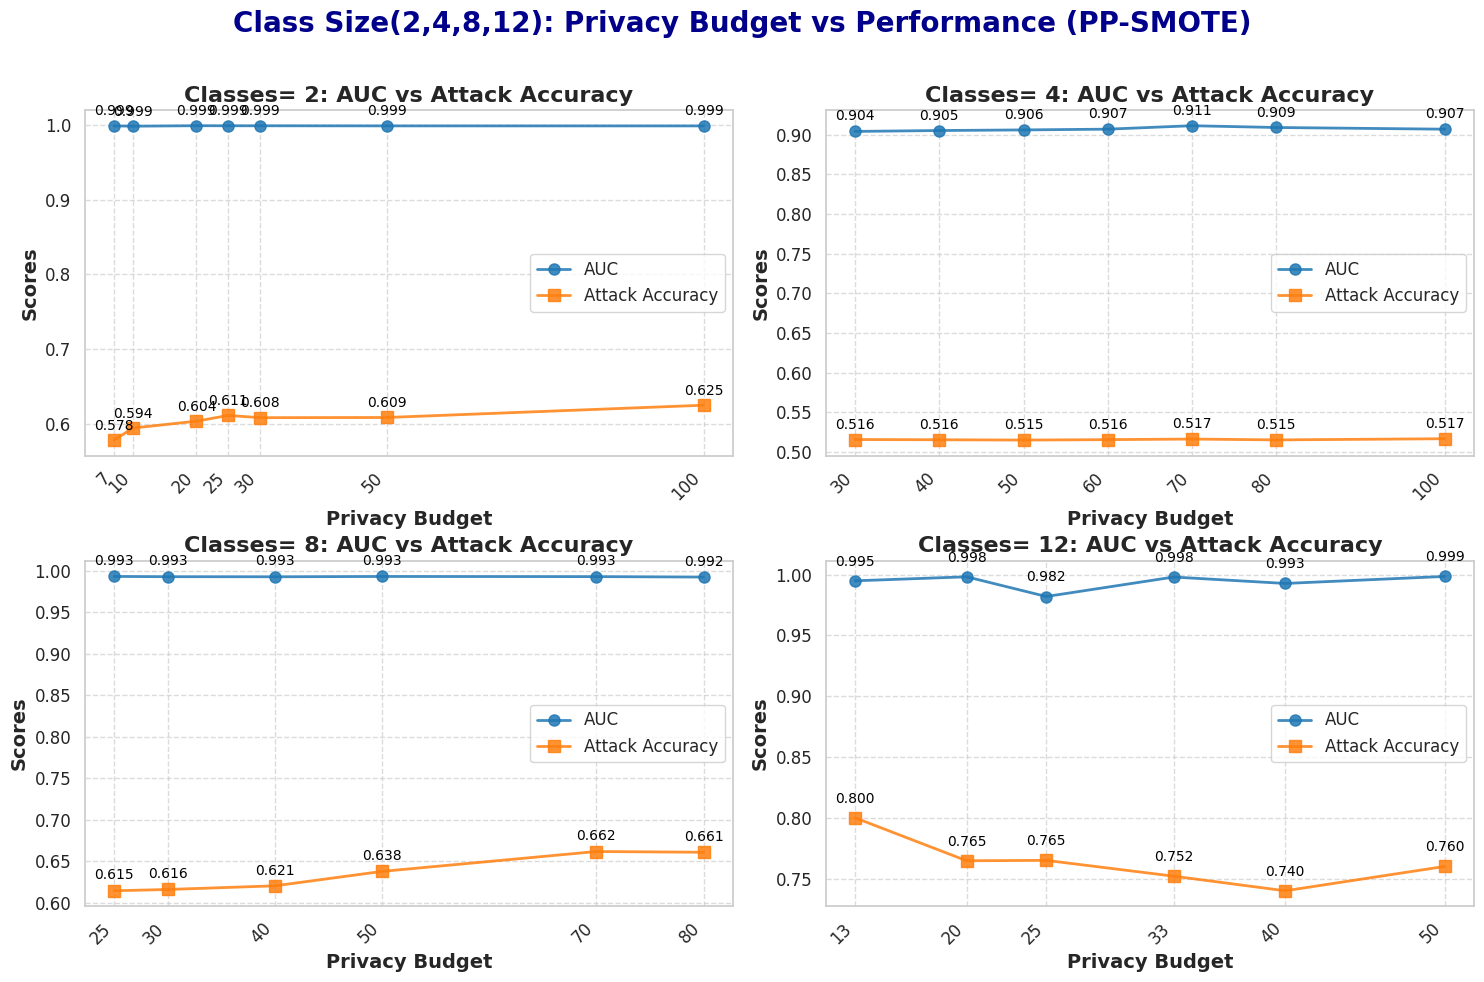

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Set the plot style
sns.set(style="whitegrid")  # Set seaborn style for fancy gridlines
plt.rcParams.update({'font.size': 12})  # Increase font size for better readability

# Step 2: Load the CSV files for each class
class_2 = pd.read_csv('Class-2-PP-SMOTE.csv')
class_4 = pd.read_csv('Class-4-PP-SMOTE.csv')
class_8 = pd.read_csv('Class-8-PP-SMOTE.csv')
class_12 = pd.read_csv('Class-12-PP-SMOTE.csv')

# Step 3: Create a function to plot a line graph for each class
def plot_class_performance(class_data, class_label, ax):
    privacy_budget = class_data['privacy_Budget']
    auc = class_data['AUC']
    attack_accuracy = class_data['Attack_Accuracy']

    # Plot lines with markers for AUC and Attack Accuracy
    ax.plot(privacy_budget, auc, marker='o', label='AUC', color='#1f77b4', linewidth=2, markersize=8, alpha=0.85)
    ax.plot(privacy_budget, attack_accuracy, marker='s', label='Attack Accuracy', color='#ff7f0e', linewidth=2, markersize=8, alpha=0.85)

    # Add data labels on each point for AUC and Attack Accuracy
    for x, y in zip(privacy_budget, auc):
        ax.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=10, color='black')
    for x, y in zip(privacy_budget, attack_accuracy):
        ax.text(x, y + 0.01, f'{y:.3f}', ha='center', va='bottom', fontsize=10, color='black')

    # Add labels, titles, and ticks
    ax.set_xlabel('Privacy Budget', fontsize=14, fontweight='bold')
    ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
    ax.set_title(f'Classes= {class_label}: AUC vs Attack Accuracy', fontsize=16, fontweight='bold')

    # Rotate x-axis tick labels to avoid overlap
    ax.set_xticks(privacy_budget)
    ax.set_xticklabels(privacy_budget, rotation=45, ha='right', fontsize=12)

    # Ensure y-axis tick values are shown for all graphs
    ax.yaxis.set_tick_params(labelsize=12)
    ax.legend(fontsize=12)

    # Fancy grid and background enhancements
    ax.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines for aesthetics

# Step 4: Create the figure and axes for the 2x2 grid (for Class 2, Class 4, Class 8, Class 12)
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)  # 2x2 grid

# Step 5: Plot the performance for each class
plot_class_performance(class_2, 2, axes[0, 0])
plot_class_performance(class_4, 4, axes[0, 1])
plot_class_performance(class_8, 8, axes[1, 0])
plot_class_performance(class_12, 12, axes[1, 1])

# Step 6: Adjust layout and save the plot
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust the spacing at the top
fig.suptitle('Class Size(2,4,8,12): Privacy Budget vs Performance (PP-SMOTE)', fontsize=20, fontweight='bold', color='darkblue')  # Main title
plt.savefig('fancy_class_comparison_PP-SMOTE_2row.png', dpi=300, bbox_inches='tight')  # Save the figure as a high-resolution PNG file
plt.show()


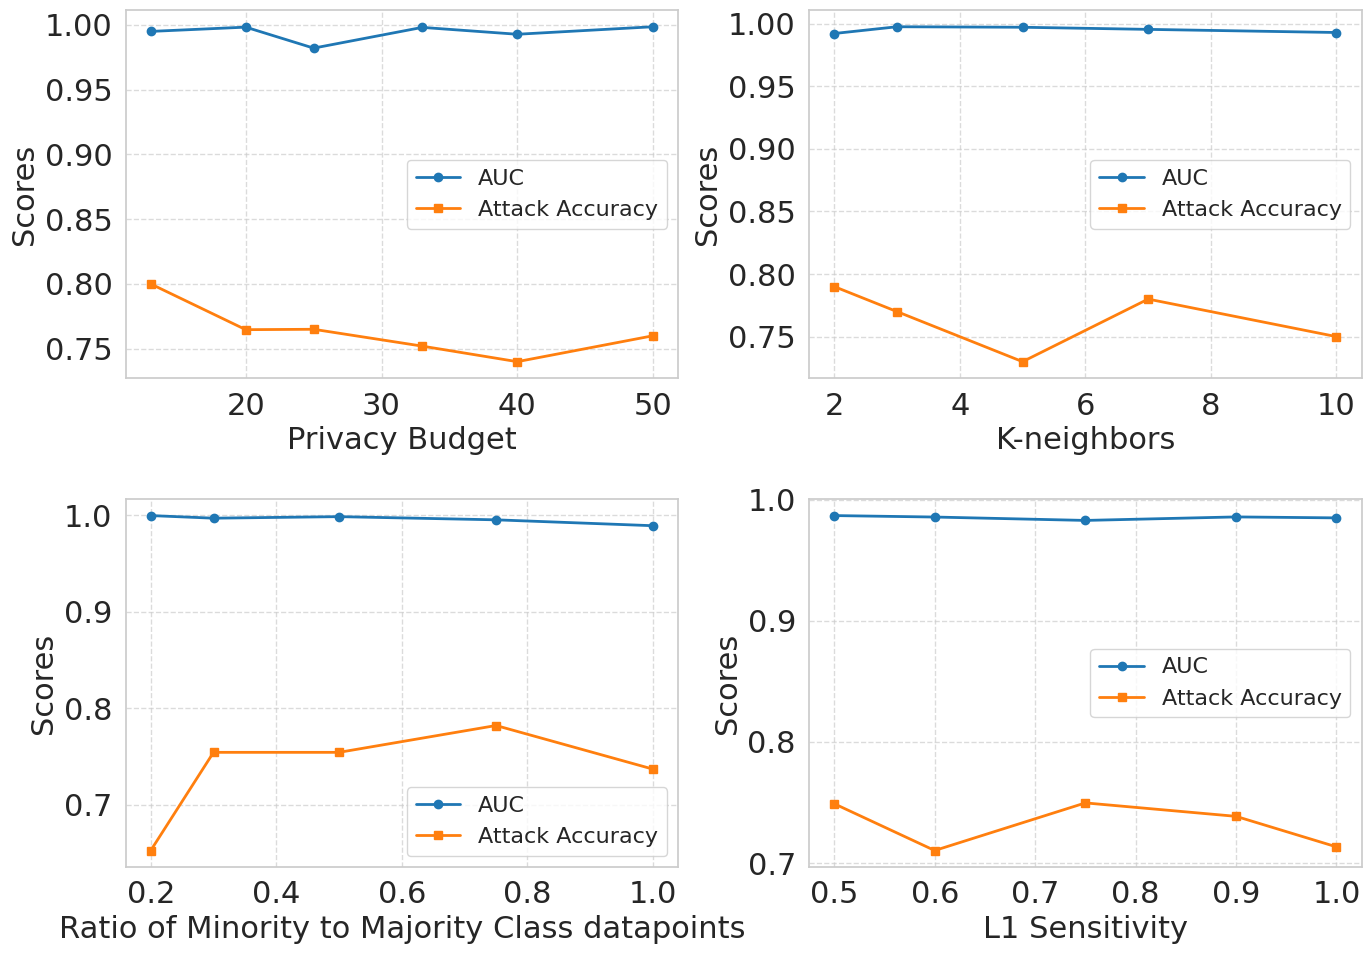

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set the plot style using seaborn for a better aesthetic
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 22, 'xtick.labelsize': 22, 'ytick.labelsize': 22})

# Step 2: Load the datasets from CSV format
data_knn = pd.DataFrame({
    'K-neighbors': [2, 3, 5, 7, 10],
    'AUC': [0.9922, 0.9976, 0.9972, 0.9955, 0.993],
    'Attack_Accuracy': [0.79, 0.77, 0.73, 0.78, 0.75]
})

data_imbalance = pd.DataFrame({
    'Imbalance_ratio': [0.2, 0.3, 0.5, 0.75, 1.0],
    'AUC': [0.9995, 0.9968, 0.9984, 0.9951, 0.9890],
    'Attack_Accuracy': [0.6525, 0.7542, 0.7542, 0.7820, 0.7368]
})

data_l1 = pd.DataFrame({
    'L1_sensitivity': [0.5, 0.6, 0.75, 0.9, 1.0],
    'AUC': [0.9869, 0.9857, 0.9829, 0.9858, 0.9850],
    'Attack_Accuracy': [0.7490, 0.7104, 0.7497, 0.7386, 0.7134]
})

data_privacy_budget = pd.DataFrame({
    'privacy_Budget': [50, 40, 33, 25, 20, 13],
    'AUC': [0.9985, 0.9927, 0.998, 0.982, 0.9982, 0.9949],
    'Attack_Accuracy': [0.76, 0.74, 0.752, 0.765, 0.7647, 0.80]
})

# Step 3: Create subplots (2x2 grid, with the third plot spanning across the second row)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 1]})

# Step 4: Define plotting function for each dataset
def plot_data(ax, x, auc, attack_acc, x_label, title):
    ax.plot(x, auc, marker='o', color='#1f77b4', label='AUC', linewidth=2)
    ax.plot(x, attack_acc, marker='s', color='#ff7f0e', label='Attack Accuracy', linewidth=2)
    ax.set_xlabel(x_label, fontsize=22)
    ax.set_ylabel('Scores', fontsize=22)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=16)

plot_data(axes[0, 0], data_privacy_budget['privacy_Budget'], data_privacy_budget['AUC'], data_privacy_budget['Attack_Accuracy'], 
          'Privacy Budget', '')

plot_data(axes[0, 1], data_knn['K-neighbors'], data_knn['AUC'], data_knn['Attack_Accuracy'], 
          'K-neighbors', '')

plot_data(axes[1, 0], data_imbalance['Imbalance_ratio'], data_imbalance['AUC'], data_imbalance['Attack_Accuracy'], 
          'Ratio of Minority to Majority Class datapoints', '')

plot_data(axes[1, 1], data_l1['L1_sensitivity'], data_l1['AUC'], data_l1['Attack_Accuracy'], 
          'L1 Sensitivity', '')

# Step 8: Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Ablation_K-IR-S.png', dpi=300, bbox_inches='tight')
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('Class-2-DP-GAN.csv')

# Set Seaborn style for fancy plots
sns.set(style="whitegrid")

# 1. Plot Privacy Budget vs. AUC
plt.figure(figsize=(8, 6))
sns.lineplot(x='privacy_Budget', y='AUC', data=data, marker='o', color='b', linewidth=2.5)
plt.title('Credit Card Dataset(Class=2) DP-GAN Performance', fontsize=16)
plt.xlabel('Privacy Budget', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.savefig('Class-2-DP-GAN-privacy_budget_auc.png')  # Save the plot
plt.close()  # Close the plot

# 2. Plot Privacy Budget vs. Attack Accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(x='privacy_Budget', y='Attack_Accuracy', data=data, marker='o', color='r', linewidth=2.5)
plt.title('Credit Card Dataset(Class=2) DP-GAN Performance', fontsize=16)
plt.xlabel('Privacy Budget', fontsize=12)
plt.ylabel('Attack Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.savefig('Class-2-DP-GAN-privacy_budget_attack_accuracy.png')  # Save the plot
plt.close()  # Close the plot


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('Class-4-DP-GAN.csv')

# Set Seaborn style for fancy plots
sns.set(style="whitegrid")

# 1. Plot Privacy Budget vs. AUC
plt.figure(figsize=(8, 6))
sns.lineplot(x='privacy_Budget', y='AUC', data=data, marker='o', color='b', linewidth=2.5)
plt.title('Texas Hospital Dataset(Class=4) Privacy Budget vs AUC', fontsize=16)
plt.xlabel('Privacy Budget', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.savefig('Class-4-DP-GAN-privacy_budget_auc.png')  # Save the plot
plt.close()  # Close the plot

# 2. Plot Privacy Budget vs. Attack Accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(x='privacy_Budget', y='Attack_Accuracy', data=data, marker='o', color='r', linewidth=2.5)
plt.title('Texas Hospital Dataset(Class=4) Privacy Budget vs Attack Accuracy', fontsize=16)
plt.xlabel('Privacy Budget', fontsize=12)
plt.ylabel('Attack Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.savefig('Class-4-DP-GAN-privacy_budget_attack_accuracy.png')  # Save the plot
plt.close()  # Close the plot


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('Class-8-DP-GAN.csv')

# Set Seaborn style for fancy plots
sns.set(style="whitegrid")

# 1. Plot Privacy Budget vs. AUC
plt.figure(figsize=(8, 6))
sns.lineplot(x='privacy_Budget', y='AUC', data=data, marker='o', color='b', linewidth=2.5)
plt.title('UNSW NB15 Dataset(Class=8) Privacy Budget vs AUC', fontsize=16)
plt.xlabel('Privacy Budget', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.savefig('Class-4-DP-GAN-privacy_budget_auc.png')  # Save the plot
plt.close()  # Close the plot

# 2. Plot Privacy Budget vs. Attack Accuracy
plt.figure(figsize=(8, 6))
sns.lineplot(x='privacy_Budget', y='Attack_Accuracy', data=data, marker='o', color='r', linewidth=2.5)
plt.title('UNSW NB15 Dataset(Class=8) Privacy Budget vs Attack Accuracy', fontsize=16)
plt.xlabel('Privacy Budget', fontsize=12)
plt.ylabel('Attack Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.savefig('Class-8-DP-GAN-privacy_budget_attack_accuracy.png')  # Save the plot
plt.close()  # Close the plot


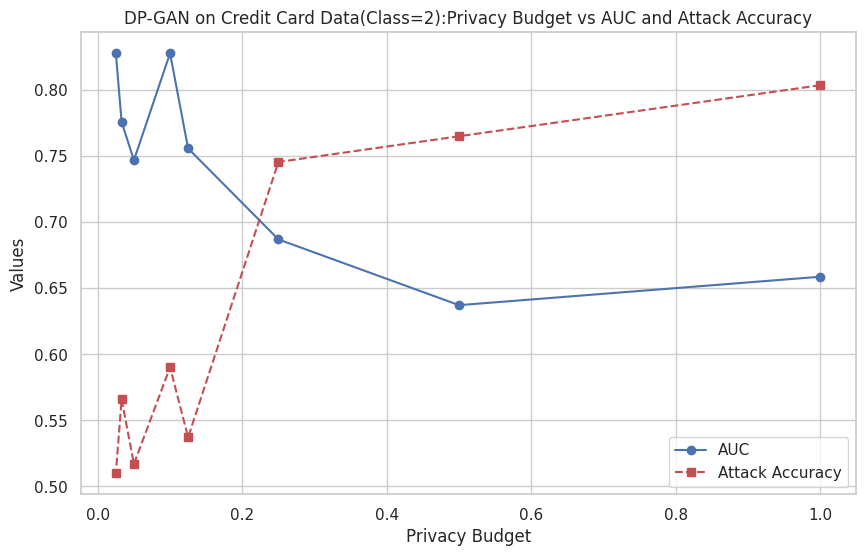

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
# Assuming the CSV file has columns: 'Privacy_Budget', 'AUC', 'Attack_Accuracy'
data = pd.read_csv('Class-2-DP-GAN.csv')

# Initialize a fancy style for the plots
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot AUC vs Privacy Budget
plt.plot(data['privacy_Budget'], data['AUC'], label='AUC', marker='o', linestyle='-', color='b')

# Plot Attack Accuracy vs Privacy Budget
plt.plot(data['privacy_Budget'], data['Attack_Accuracy'], label='Attack Accuracy', marker='s', linestyle='--', color='r')

# Add labels and title
plt.xlabel('Privacy Budget')
plt.ylabel('Values')
plt.title('DP-GAN on Credit Card Data(Class=2):Privacy Budget vs AUC and Attack Accuracy')

# Add a legend
plt.legend()

# Save the figure into one file (you can use 'png', 'pdf', etc.)
plt.savefig('Class-2-DPGAN-privacy_auc_attack_accuracy.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


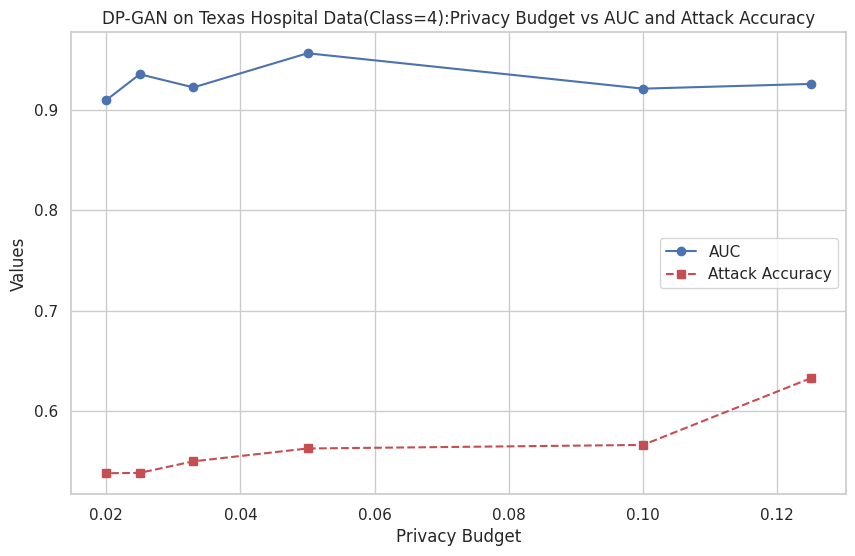

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
# Assuming the CSV file has columns: 'Privacy_Budget', 'AUC', 'Attack_Accuracy'
data = pd.read_csv('Class-4-DP-GAN.csv')

# Initialize a fancy style for the plots
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot AUC vs Privacy Budget
plt.plot(data['privacy_Budget'], data['AUC'], label='AUC', marker='o', linestyle='-', color='b')

# Plot Attack Accuracy vs Privacy Budget
plt.plot(data['privacy_Budget'], data['Attack_Accuracy'], label='Attack Accuracy', marker='s', linestyle='--', color='r')

# Add labels and title
plt.xlabel('Privacy Budget')
plt.ylabel('Values')
plt.title('DP-GAN on Texas Hospital Data(Class=4):Privacy Budget vs AUC and Attack Accuracy')

# Add a legend
plt.legend()

# Save the figure into one file (you can use 'png', 'pdf', etc.)
plt.savefig('Class-4-DPGAN-privacy_auc_attack_accuracy.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


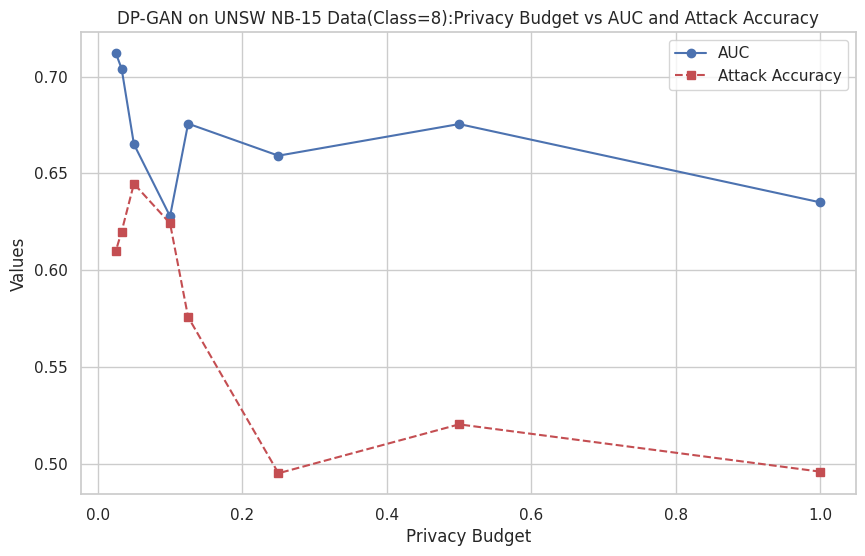

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
# Assuming the CSV file has columns: 'Privacy_Budget', 'AUC', 'Attack_Accuracy'
data = pd.read_csv('Class-8-DP-GAN.csv')

# Initialize a fancy style for the plots
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot AUC vs Privacy Budget
plt.plot(data['privacy_Budget'], data['AUC'], label='AUC', marker='o', linestyle='-', color='b')

# Plot Attack Accuracy vs Privacy Budget
plt.plot(data['privacy_Budget'], data['Attack_Accuracy'], label='Attack Accuracy', marker='s', linestyle='--', color='r')

# Add labels and title
plt.xlabel('Privacy Budget')
plt.ylabel('Values')
plt.title('DP-GAN on UNSW NB-15 Data(Class=8):Privacy Budget vs AUC and Attack Accuracy')

# Add a legend
plt.legend()

# Save the figure into one file (you can use 'png', 'pdf', etc.)
plt.savefig('Class-8-DPGAN-privacy_auc_attack_accuracy.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


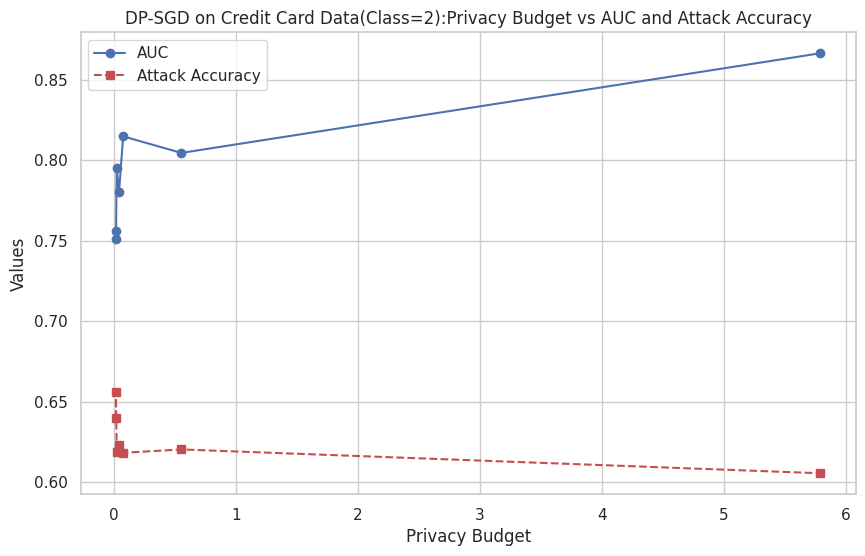

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
# Assuming the CSV file has columns: 'Privacy_Budget', 'AUC', 'Attack_Accuracy'
data = pd.read_csv('Class-2-DP-SGD.csv')

# Initialize a fancy style for the plots
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot AUC vs Privacy Budget
plt.plot(data['privacy_Budget'], data['AUC'], label='AUC', marker='o', linestyle='-', color='b')

# Plot Attack Accuracy vs Privacy Budget
plt.plot(data['privacy_Budget'], data['Attack_Accuracy'], label='Attack Accuracy', marker='s', linestyle='--', color='r')

# Add labels and title
plt.xlabel('Privacy Budget')
plt.ylabel('Values')
plt.title('DP-SGD on Credit Card Data(Class=2):Privacy Budget vs AUC and Attack Accuracy')

# Add a legend
plt.legend()

# Save the figure into one file (you can use 'png', 'pdf', etc.)
plt.savefig('Class-2-DPSGD-privacy_auc_attack_accuracy.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


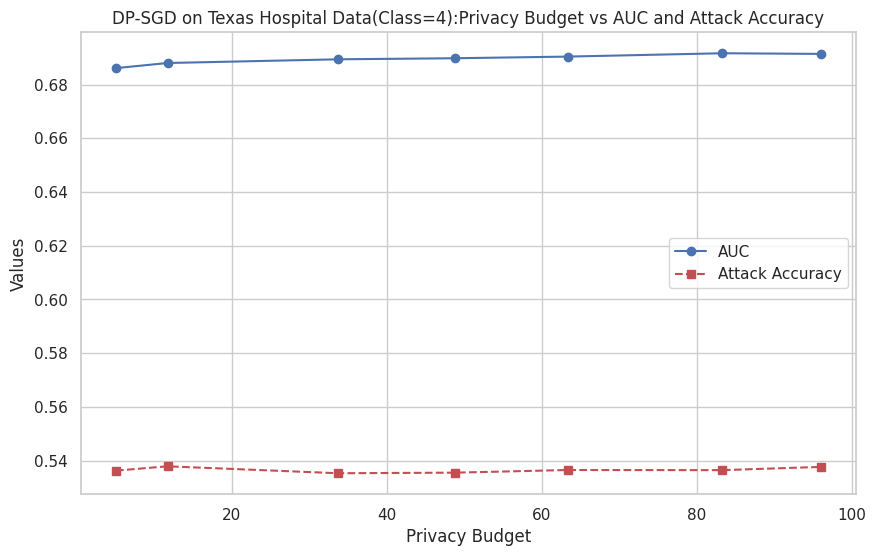

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
# Assuming the CSV file has columns: 'Privacy_Budget', 'AUC', 'Attack_Accuracy'
data = pd.read_csv('Class-4-DP-SGD.csv')

# Initialize a fancy style for the plots
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot AUC vs Privacy Budget
plt.plot(data['privacy_Budget'], data['AUC'], label='AUC', marker='o', linestyle='-', color='b')

# Plot Attack Accuracy vs Privacy Budget
plt.plot(data['privacy_Budget'], data['Attack_Accuracy'], label='Attack Accuracy', marker='s', linestyle='--', color='r')

# Add labels and title
plt.xlabel('Privacy Budget')
plt.ylabel('Values')
plt.title('DP-SGD on Texas Hospital Data(Class=4):Privacy Budget vs AUC and Attack Accuracy')

# Add a legend
plt.legend()

# Save the figure into one file (you can use 'png', 'pdf', etc.)
plt.savefig('Class-4-DPSGD-privacy_auc_attack_accuracy.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


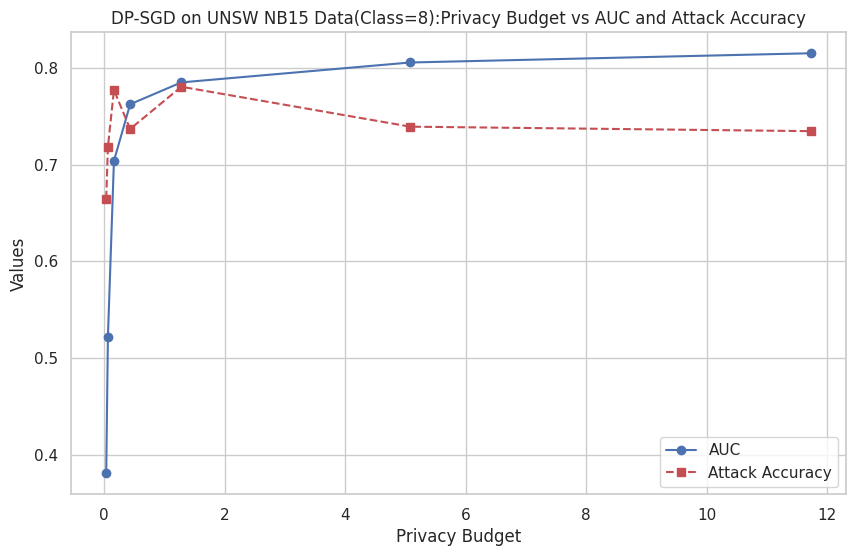

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
# Assuming the CSV file has columns: 'Privacy_Budget', 'AUC', 'Attack_Accuracy'
data = pd.read_csv('Class-8-DP-SGD.csv')

# Initialize a fancy style for the plots
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot AUC vs Privacy Budget
plt.plot(data['privacy_Budget'], data['AUC'], label='AUC', marker='o', linestyle='-', color='b')

# Plot Attack Accuracy vs Privacy Budget
plt.plot(data['privacy_Budget'], data['Attack_Accuracy'], label='Attack Accuracy', marker='s', linestyle='--', color='r')

# Add labels and title
plt.xlabel('Privacy Budget')
plt.ylabel('Values')
plt.title('DP-SGD on UNSW NB15 Data(Class=8):Privacy Budget vs AUC and Attack Accuracy')

# Add a legend
plt.legend()

# Save the figure into one file (you can use 'png', 'pdf', etc.)
plt.savefig('Class-8-DPSGD-privacy_auc_attack_accuracy.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


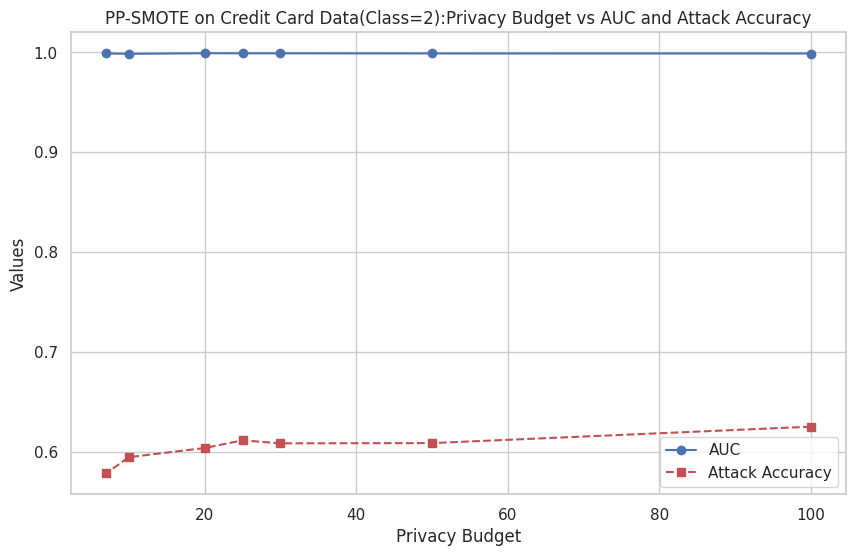

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
# Assuming the CSV file has columns: 'Privacy_Budget', 'AUC', 'Attack_Accuracy'
data = pd.read_csv('Class-2-PP-SMOTE.csv')

# Initialize a fancy style for the plots
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot AUC vs Privacy Budget
plt.plot(data['privacy_Budget'], data['AUC'], label='AUC', marker='o', linestyle='-', color='b')

# Plot Attack Accuracy vs Privacy Budget
plt.plot(data['privacy_Budget'], data['Attack_Accuracy'], label='Attack Accuracy', marker='s', linestyle='--', color='r')

# Add labels and title
plt.xlabel('Privacy Budget')
plt.ylabel('Values')
plt.title('PP-SMOTE on Credit Card Data(Class=2):Privacy Budget vs AUC and Attack Accuracy')

# Add a legend
plt.legend()

# Save the figure into one file (you can use 'png', 'pdf', etc.)
plt.savefig('Class-2-PPSMOTE-privacy_auc_attack_accuracy.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


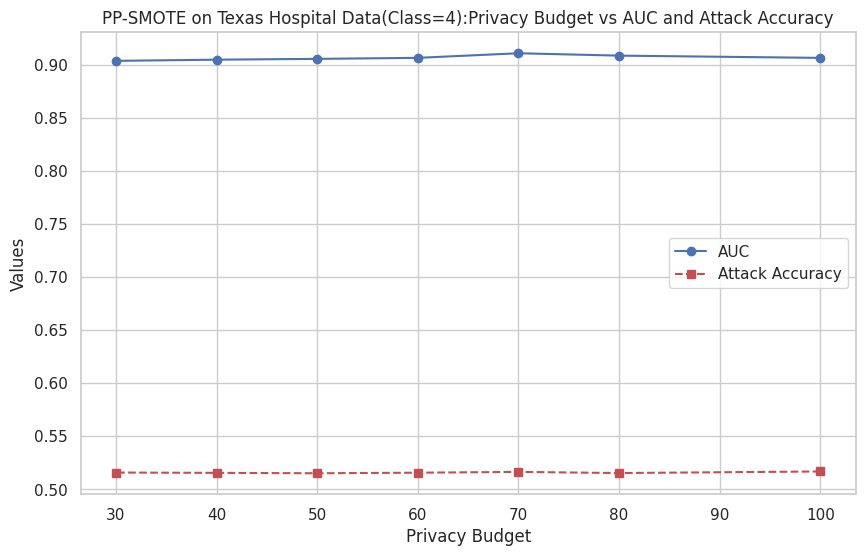

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
# Assuming the CSV file has columns: 'Privacy_Budget', 'AUC', 'Attack_Accuracy'
data = pd.read_csv('Class-4-PP-SMOTE.csv')

# Initialize a fancy style for the plots
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot AUC vs Privacy Budget
plt.plot(data['privacy_Budget'], data['AUC'], label='AUC', marker='o', linestyle='-', color='b')

# Plot Attack Accuracy vs Privacy Budget
plt.plot(data['privacy_Budget'], data['Attack_Accuracy'], label='Attack Accuracy', marker='s', linestyle='--', color='r')

# Add labels and title
plt.xlabel('Privacy Budget')
plt.ylabel('Values')
plt.title('PP-SMOTE on Texas Hospital Data(Class=4):Privacy Budget vs AUC and Attack Accuracy')

# Add a legend
plt.legend()

# Save the figure into one file (you can use 'png', 'pdf', etc.)
plt.savefig('Class-4-PPSMOTE-privacy_auc_attack_accuracy.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


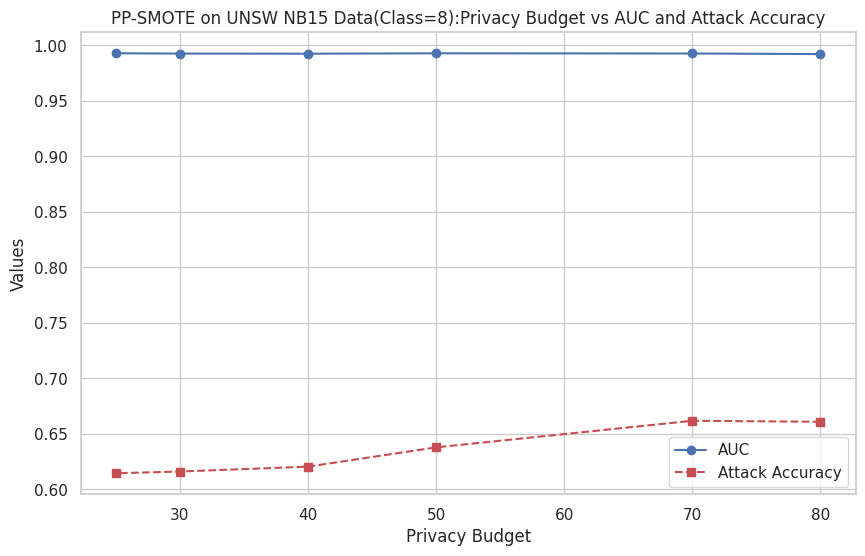

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
# Assuming the CSV file has columns: 'Privacy_Budget', 'AUC', 'Attack_Accuracy'
data = pd.read_csv('Class-8-PP-SMOTE.csv')

# Initialize a fancy style for the plots
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot AUC vs Privacy Budget
plt.plot(data['privacy_Budget'], data['AUC'], label='AUC', marker='o', linestyle='-', color='b')

# Plot Attack Accuracy vs Privacy Budget
plt.plot(data['privacy_Budget'], data['Attack_Accuracy'], label='Attack Accuracy', marker='s', linestyle='--', color='r')

# Add labels and title
plt.xlabel('Privacy Budget')
plt.ylabel('Values')
plt.title('PP-SMOTE on UNSW NB15 Data(Class=8):Privacy Budget vs AUC and Attack Accuracy')

# Add a legend
plt.legend()

# Save the figure into one file (you can use 'png', 'pdf', etc.)
plt.savefig('Class-8-PPSMOTE-privacy_auc_attack_accuracy.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Set seaborn style for a cleaner look
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})  # Increase font size

# Step 2: Load the CSV files for each class
class_2 = pd.read_csv('Class-2-auc-attack.csv')
class_4 = pd.read_csv('Class-4-auc-attack.csv')
class_8 = pd.read_csv('Class-8-auc-attack.csv')

# Step 3: Define the function to plot a grouped bar chart for each class
def plot_class_performance(class_data, class_label, output_filename):
    # Create a new figure for each plot
    fig, ax = plt.subplots(figsize=(7, 5))
    
    oversampling_methods = class_data['oversampling']
    auc = class_data['AUC']
    attack_accuracy = class_data['Attack_Accuracy']

    # Set the bar width and positions
    bar_width = 0.35
    index = np.arange(len(oversampling_methods))

    # Create the bars for AUC and Attack Accuracy with custom styling
    bars1 = ax.bar(index, auc, bar_width, label='AUC', color='#1f77b4', edgecolor='black', hatch='/', alpha=0.85)
    bars2 = ax.bar(index + bar_width, attack_accuracy, bar_width, label='Attack Accuracy', color='#ff7f0e', edgecolor='black', hatch='\\', alpha=0.85)

    # Add labels on top of the bars for AUC and Attack Accuracy
    for bar in bars1:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10, color='black')
    for bar in bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom', fontsize=10, color='black')

    # Set labels, title, and ticks
    ax.set_xlabel('Oversampling Method', fontsize=14, fontweight='bold')
    ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
    ax.set_title(f'Class={class_label}: AUC vs Attack Accuracy', fontsize=16, fontweight='bold')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(oversampling_methods, rotation=45, fontsize=12)
    ax.legend(fontsize=12)

    # Add gridlines for clarity
    ax.grid(True, linestyle='--', alpha=0.7)

    # Step 4: Save the plot as a high-resolution PNG file
    plt.tight_layout()
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    plt.close()  # Close the figure to avoid memory issues

# Step 5: Plot and save the performance for each class
plot_class_performance(class_2, 2, 'class_2_auc_attack.png')
plot_class_performance(class_4, 4, 'class_4_auc_attack.png')
plot_class_performance(class_8, 8, 'class_8_auc_attack.png')

print("Plots saved as separate files: class_2_auc_attack.png, class_4_auc_attack.png, class_8_auc_attack.png")


Plots saved as separate files: class_2_auc_attack.png, class_4_auc_attack.png, class_8_auc_attack.png


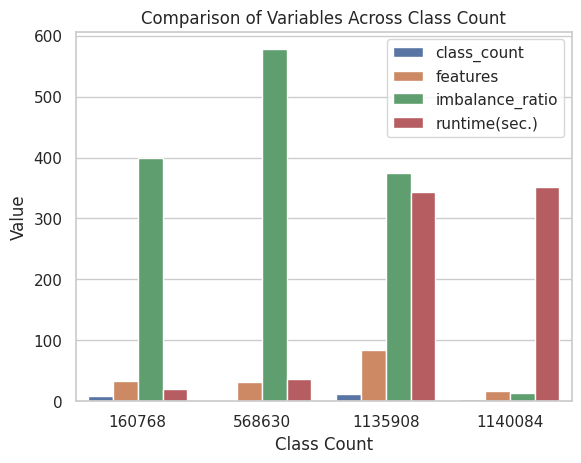

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    "class_count": [2, 4, 8, 12],
    "features": [31, 17, 34, 84],
    "imbalance_ratio": [577.8, 13, 400, 374.27],
    "oversampled_data_points": [568630, 1140084, 160768, 1135908],
    "runtime(sec.)": [36, 351, 20, 344]
}

df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='oversampled_data_points')

# Create a grouped bar chart
sns.barplot(x='oversampled_data_points', y='value', hue='variable', data=df_melted)
plt.title('Comparison of Variables Across Class Count')
plt.xlabel('Class Count')
plt.ylabel('Value')
plt.legend(title='')
plt.show()

/tmp/ipykernel_2655924/2435313678.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="labels", y="data_points", data=df, palette="pastel")


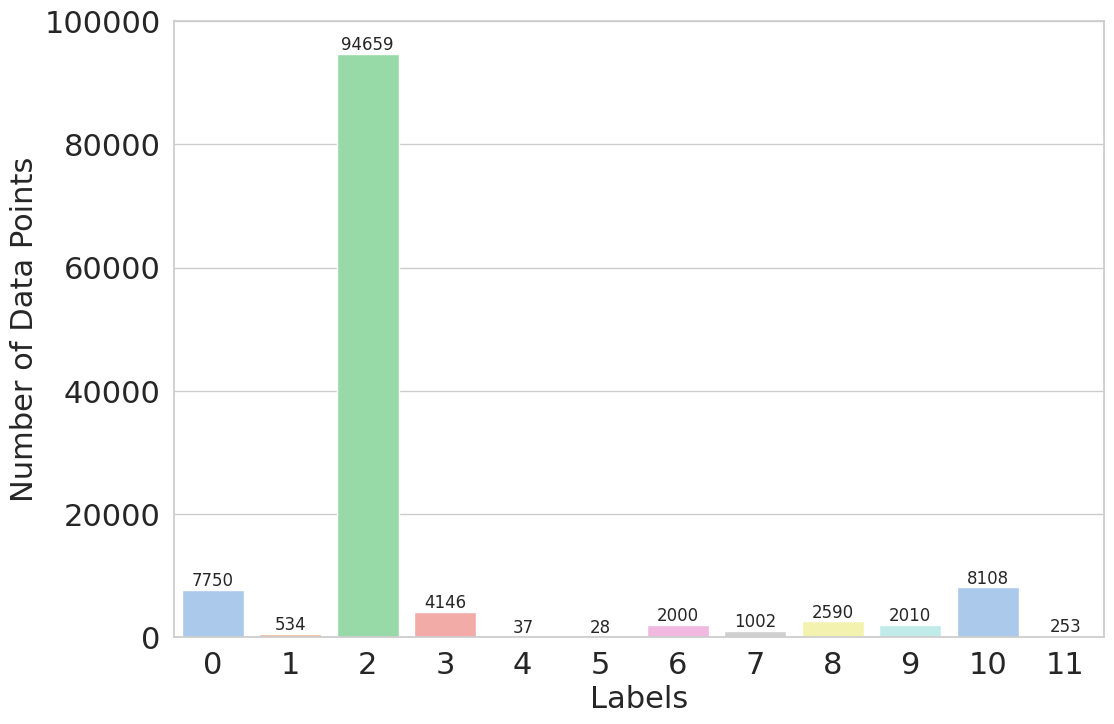

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    "labels": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    "data_points": [7750, 534, 94659, 4146, 37, 28, 2000, 1002, 2590, 2010, 8108, 253]
}

df = pd.DataFrame(data)

# Create a bar chart using Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))  # Increase figure size
ax = sns.barplot(x="labels", y="data_points", data=df, palette="pastel")

# Annotate values
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set labels and title
#plt.title("Number of Data Points for Each Class in RTIoT Data (Classes=12)")
plt.xlabel("Labels", fontsize=22)
plt.ylabel("Number of Data Points", fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(0, 100000)
plt.savefig("Class12-Imbalance_graph.png", dpi=300, bbox_inches='tight')

plt.show()

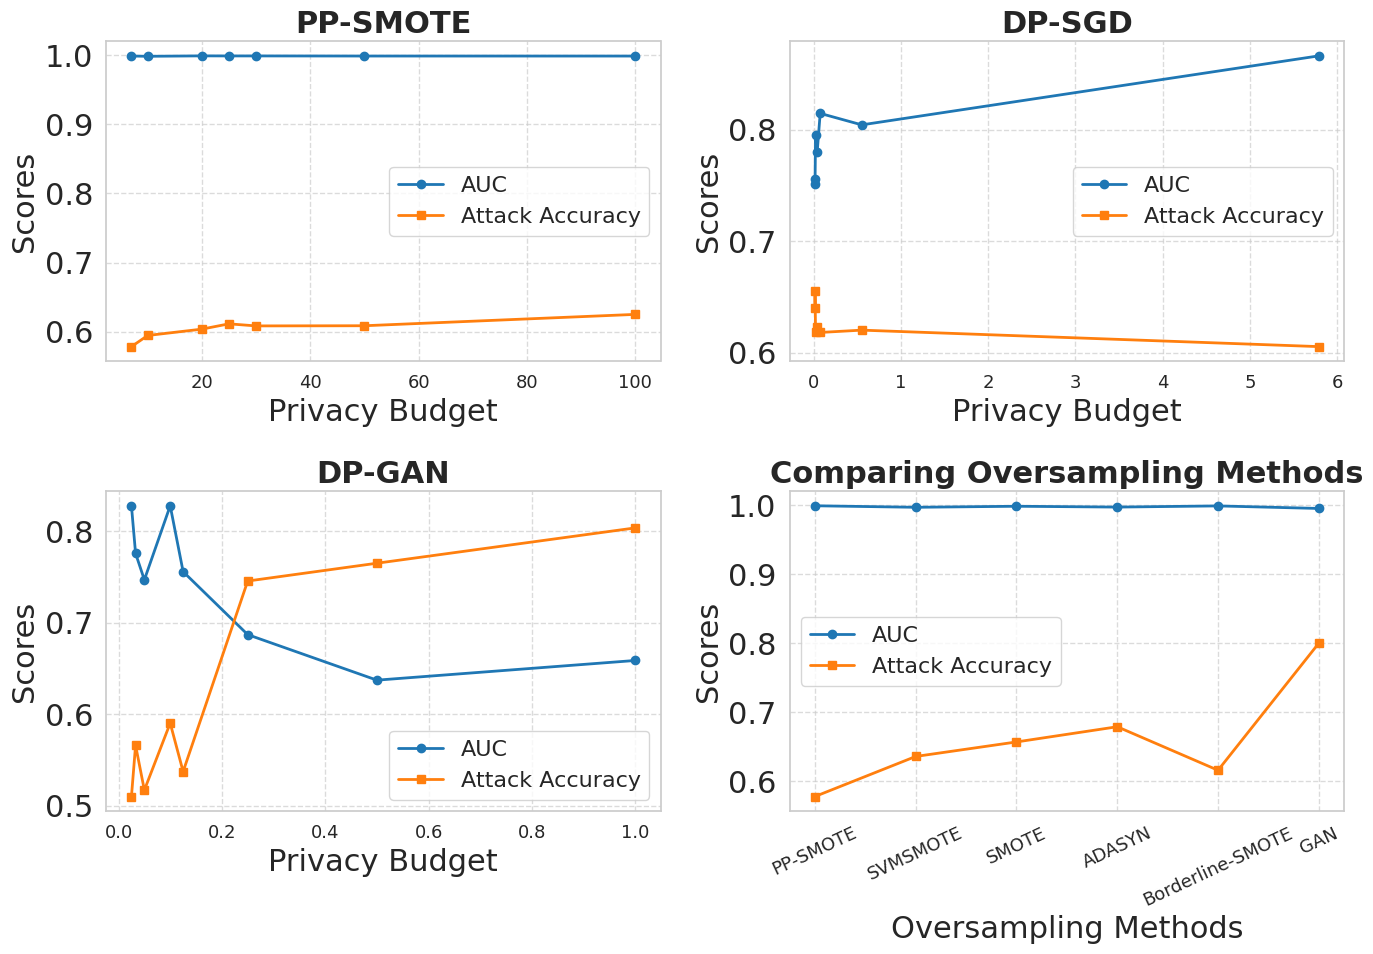

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 22, 'xtick.labelsize': 13, 'ytick.labelsize': 22})

data_PP_SMOTE = pd.read_csv('Class-2-PP-SMOTE.csv')
data_DP_SGD = pd.read_csv('Class-2-DP-SGD.csv')
data_DP_GAN = pd.read_csv('Class-2-DP-GAN.csv')
data_Class2_AUC = pd.read_csv('Class-2-auc-attack.csv')

# Step 3: Create subplots (2x2 grid, with the third plot spanning across the second row)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 1]})
#fig.delaxes(axes[1, 1])  # Remove the empty subplot (2nd row, 2nd column)

# Step 4: Define plotting function for each dataset
def plot_data(ax, x, auc, attack_acc, x_label, title, x_tick_rotation=0):
    ax.plot(x, auc, marker='o', color='#1f77b4', label='AUC', linewidth=2)
    ax.plot(x, attack_acc, marker='s', color='#ff7f0e', label='Attack Accuracy', linewidth=2)
    ax.set_xlabel(x_label, fontsize=22)
    ax.set_ylabel('Scores', fontsize=22)
    ax.set_title(title, fontsize=22, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=16)

    ax.tick_params(axis='x', rotation=x_tick_rotation)
    
# Step 5: Plot K-neighbors data
plot_data(axes[0, 0], data_PP_SMOTE['privacy_Budget'], data_PP_SMOTE['AUC'], data_PP_SMOTE['Attack_Accuracy'], 
          'Privacy Budget', 'PP-SMOTE')

# Step 6: Plot Imbalance Ratio data
plot_data(axes[0, 1], data_DP_SGD['privacy_Budget'], data_DP_SGD['AUC'], data_DP_SGD['Attack_Accuracy'], 
          'Privacy Budget', 'DP-SGD')

# Step 7: Plot L1 Sensitivity data (across the entire second row)
plot_data(axes[1, 0], data_DP_GAN['privacy_Budget'], data_DP_GAN['AUC'], data_DP_GAN['Attack_Accuracy'], 
          'Privacy Budget', 'DP-GAN')

plot_data(axes[1, 1], data_Class2_AUC['oversampling'], data_Class2_AUC['AUC'], data_Class2_AUC['Attack_Accuracy'], 
          'Oversampling Methods', 'Comparing Oversampling Methods', x_tick_rotation=25)

# Step 8: Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Class2-PP-SMOTE-Comparison-UP.png', dpi=300, bbox_inches='tight')
plt.show()


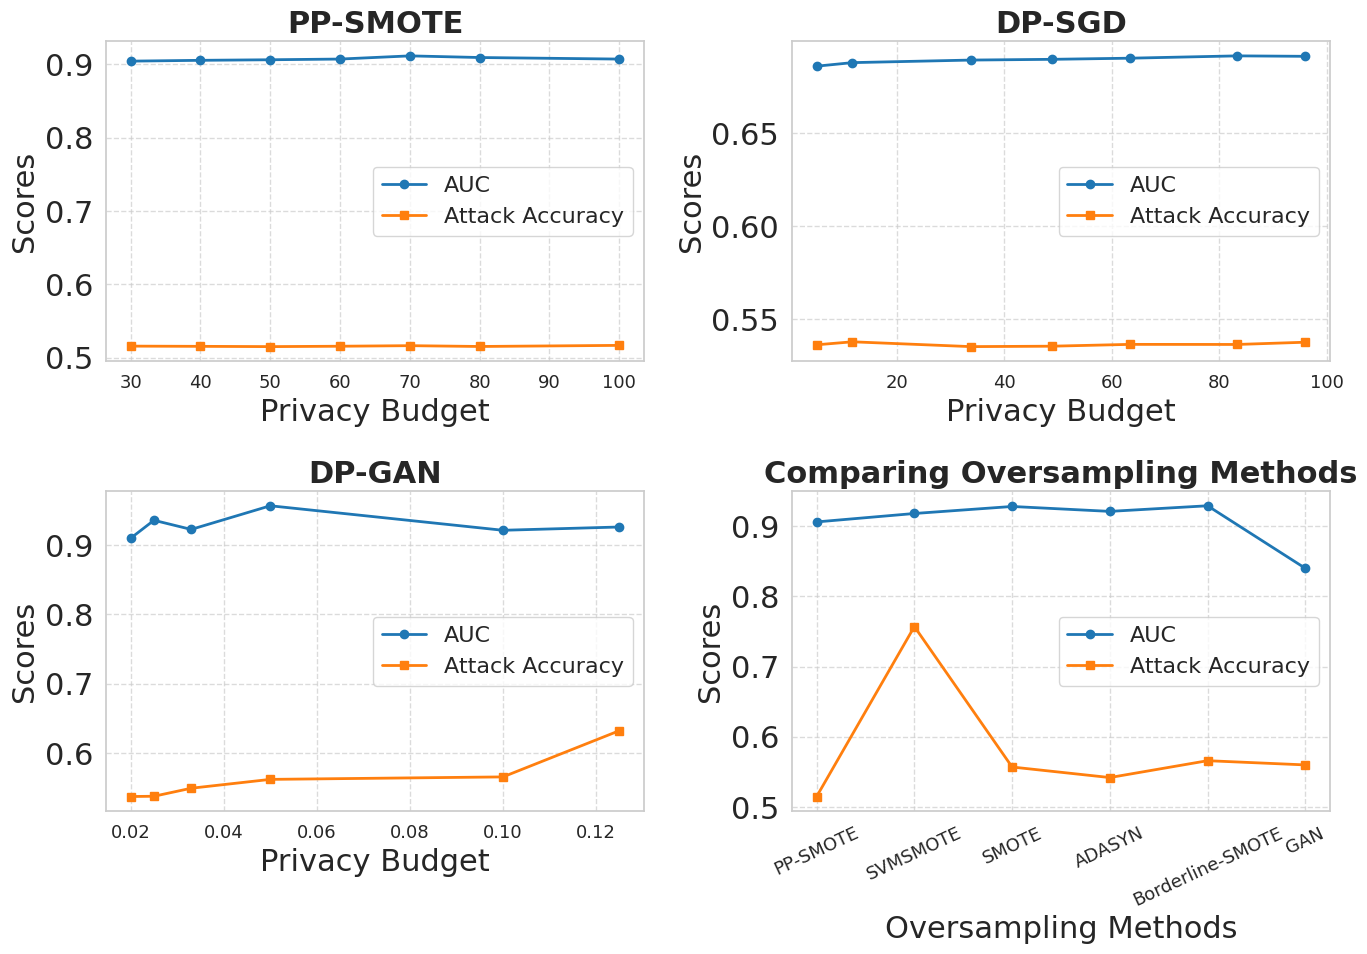

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 22, 'xtick.labelsize': 13, 'ytick.labelsize': 22})

data_PP_SMOTE = pd.read_csv('Class-4-PP-SMOTE.csv')
data_DP_SGD = pd.read_csv('Class-4-DP-SGD.csv')
data_DP_GAN = pd.read_csv('Class-4-DP-GAN.csv')
data_Class4_AUC = pd.read_csv('Class-4-auc-attack.csv')

# Step 3: Create subplots (2x2 grid, with the third plot spanning across the second row)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 1]})
#fig.delaxes(axes[1, 1])  # Remove the empty subplot (2nd row, 2nd column)

# Step 4: Define plotting function for each dataset
def plot_data(ax, x, auc, attack_acc, x_label, title, x_tick_rotation=0):
    ax.plot(x, auc, marker='o', color='#1f77b4', label='AUC', linewidth=2)
    ax.plot(x, attack_acc, marker='s', color='#ff7f0e', label='Attack Accuracy', linewidth=2)
    ax.set_xlabel(x_label, fontsize=22)
    ax.set_ylabel('Scores', fontsize=22)
    ax.set_title(title, fontsize=22, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=16)
    ax.tick_params(axis='x', rotation=x_tick_rotation)

# Step 5: Plot K-neighbors data
plot_data(axes[0, 0], data_PP_SMOTE['privacy_Budget'], data_PP_SMOTE['AUC'], data_PP_SMOTE['Attack_Accuracy'], 
          'Privacy Budget', 'PP-SMOTE')

# Step 6: Plot Imbalance Ratio data
plot_data(axes[0, 1], data_DP_SGD['privacy_Budget'], data_DP_SGD['AUC'], data_DP_SGD['Attack_Accuracy'], 
          'Privacy Budget', 'DP-SGD')

# Step 7: Plot L1 Sensitivity data (across the entire second row)
plot_data(axes[1, 0], data_DP_GAN['privacy_Budget'], data_DP_GAN['AUC'], data_DP_GAN['Attack_Accuracy'], 
          'Privacy Budget', 'DP-GAN')

plot_data(axes[1, 1], data_Class4_AUC['oversampling'], data_Class4_AUC['AUC'], data_Class4_AUC['Attack_Accuracy'], 
          'Oversampling Methods', 'Comparing Oversampling Methods', x_tick_rotation=25)

# Step 8: Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Class4-PP-SMOTE-Comparison-UP.png', dpi=300, bbox_inches='tight')
plt.show()


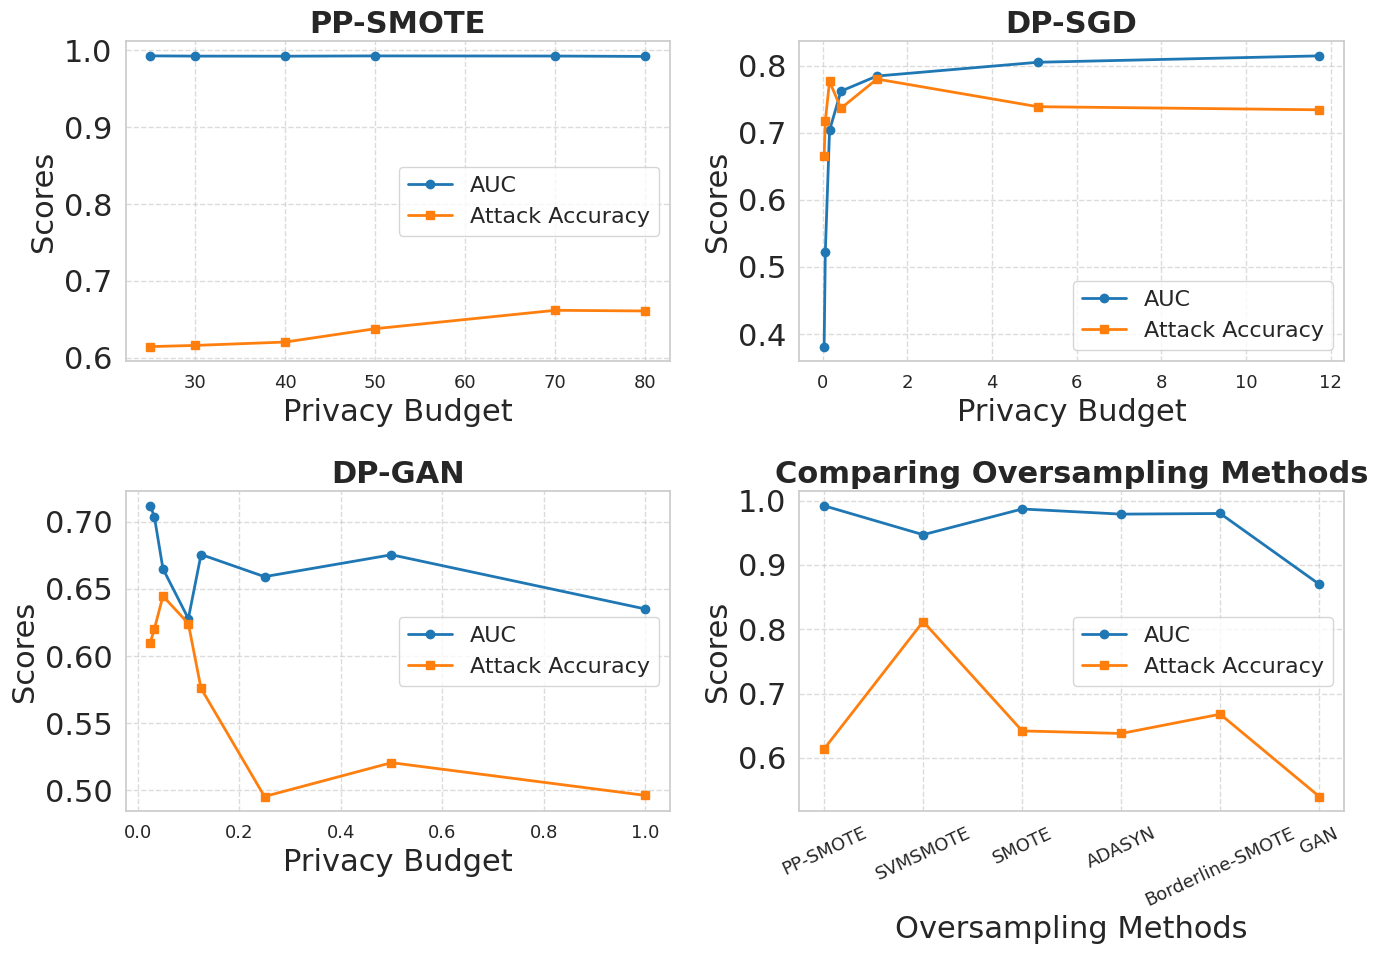

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 22, 'xtick.labelsize': 13, 'ytick.labelsize': 22})

data_PP_SMOTE = pd.read_csv('Class-8-PP-SMOTE.csv')
data_DP_SGD = pd.read_csv('Class-8-DP-SGD.csv')
data_DP_GAN = pd.read_csv('Class-8-DP-GAN.csv')
data_Class8_AUC = pd.read_csv('Class-8-auc-attack.csv')

# Step 3: Create subplots (2x2 grid, with the third plot spanning across the second row)
fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 1]})
#fig.delaxes(axes[1, 1])  # Remove the empty subplot (2nd row, 2nd column)

# Step 4: Define plotting function for each dataset
def plot_data(ax, x, auc, attack_acc, x_label, title, x_tick_rotation=0):
    ax.plot(x, auc, marker='o', color='#1f77b4', label='AUC', linewidth=2)
    ax.plot(x, attack_acc, marker='s', color='#ff7f0e', label='Attack Accuracy', linewidth=2)
    ax.set_xlabel(x_label, fontsize=22)
    ax.set_ylabel('Scores', fontsize=22)
    ax.set_title(title, fontsize=22, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=16)
    ax.tick_params(axis='x', rotation=x_tick_rotation)
    
# Step 5: Plot K-neighbors data
plot_data(axes[0, 0], data_PP_SMOTE['privacy_Budget'], data_PP_SMOTE['AUC'], data_PP_SMOTE['Attack_Accuracy'], 
          'Privacy Budget', 'PP-SMOTE')

# Step 6: Plot Imbalance Ratio data
plot_data(axes[0, 1], data_DP_SGD['privacy_Budget'], data_DP_SGD['AUC'], data_DP_SGD['Attack_Accuracy'], 
          'Privacy Budget', 'DP-SGD')

# Step 7: Plot L1 Sensitivity data (across the entire second row)
plot_data(axes[1, 0], data_DP_GAN['privacy_Budget'], data_DP_GAN['AUC'], data_DP_GAN['Attack_Accuracy'], 
          'Privacy Budget', 'DP-GAN')

plot_data(axes[1, 1], data_Class8_AUC['oversampling'], data_Class8_AUC['AUC'], data_Class8_AUC['Attack_Accuracy'], 
          'Oversampling Methods', 'Comparing Oversampling Methods', x_tick_rotation=25)

# Step 8: Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Class8-PP-SMOTE-Comparison-UP.png', dpi=300, bbox_inches='tight')
plt.show()


In [92]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([160768, 568630, 1135908, 1140084]).reshape(-1, 1)
y = np.array([20, 36, 344, 351])

# Create polynomial features
degree = 2  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the runtime for new data points
new_data = np.array([1140084]).reshape(-1, 1)
new_data_poly = poly_features.transform(new_data)
predicted_runtime = model.predict(new_data_poly)

print("Predicted runtime:", predicted_runtime)

Predicted runtime: [349.27062962]


In [88]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([160768, 568630, 1135908, 1140084]).reshape(-1, 1)
y = np.array([20, 36, 344, 351])

# Create polynomial features (adjust the degree as needed)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Get the coefficients
coefficients = model.coef_

# Print the polynomial equation
print("Polynomial Equation:")
print(f"y = {coefficients[0]} + {coefficients[1]}x + {coefficients[2]}x^2")

Polynomial Equation:
y = 0.0 + -0.0003400688748723087x + 5.198772719825287e-10x^2
